# Part 1
## The likelihood function associated with this model  
The likelihood function associated with this model is:  

> `L(theta | x) = 2(pi)^(-T/2)* E(x*x')^(-1/2) exp{(-1/2)*x'*E(x*x')*x}` 

where E(x*x') = sig2 for AR(1) ans E(x*x') is the T*T covariance matrix of x depending on theta

the log-likelihood associated with the model is:  

> `l(theta|x) = (-1/2)[T*log(2*pi) + log(E[x*x']) + x'E[x*x']x]`  

where E(x*x') = sig2 for AR(1) ans E(x*x') is the T*T covariance matrix of x depending on theta


### Creating our functions 

In [2]:
# Imports
import numpy as np 
import numdifftools as nd
from math import sqrt
from math import log
from math import pi
from random import seed
from random import gauss
import pandas as pd
import scipy.optimize
from geneticalgorithm import geneticalgorithm as ga
import time
import matplotlib.pyplot as plt


`createguess` function returns a transposed numpy array of our initial values used for the gradient based method that I will be using to maximize our likelihood function  

`datageneratingprocess` Here is a fnction that replicates the model that is shown in the question sheet. It takes in a 2 parameters and a size. It follows a guassian normal for the residuals.  

`func` takes in the intial parameters then fits them to the arma11model.  

`arma11model` this model replicates the video provided to us for help. It takes in 2 parameters, phi1 and theta1.  

`newtonraphson` this model replicates the video provided to us for help. We first take the inverse of the hessian at the point initialized by our parameter guess and we multiply the gradient at the parameter point. Next we move onto the while loop. We take the difference of the what was specified above and the parameter we then multiply the result and square root them.

In [3]:
def createguess(param1, param2):
    para_guess = np.array([param1, param2]).T
    return para_guess

In [4]:
#Generate our data
def datageneratingprocess(param1, param2, size):
    seed(97)
    X = [0]
    E = [0]

    etlag = 0
    x = 0
    for _ in range(size):
        et = gauss(0,1)
        x = param1*x + et + param2*etlag
        etlag = et
        X.append(x)
        E.append(et)
    result = pd.DataFrame({
        'Xlag':X,
        'Etlag': E
        })
    result['X'] = result['Xlag'].shift(-1)
    result = result['X'].dropna().values
    return result


In [5]:
def func(x):
    temp.append(arma11model(x[0], x[1], data))
    return arma11model(x[0], x[1], data)


In [6]:
def arma11model(phi1, theta1, data):
    size = len(data)
    res = np.zeros((size,1))
    res[0] = 0
    vX = np.ones((size, 1))*np.mean(data)
    for i in range(1, size):
        vX[i] = (phi1*data[i-1]) + (theta1*res[i-1])
        res[i] = data[i] - vX[i]

    sig2 = np.mean(res**2)
    obj = (size/2)*log(2*pi) + (size/2)*log(sig2) + sum(res**2)/(2*sig2)
    
    return obj[0]

In [7]:
def newtonraphson(para_guess, func=func):
    Hfun = nd.Hessian(func)
    Gfun = nd.Gradient(func)
    x = para_guess - (np.dot(np.linalg.inv(Hfun(para_guess)),np.array(Gfun(para_guess)).T))
    while (sqrt(np.dot((x - para_guess).T,(x-para_guess))) > (10**-3)):
        para_guess = x
        x = para_guess - np.dot(np.linalg.inv(Hfun(x)),np.array(Gfun(x)).T)
    return x

In [8]:
def fminoptimize(func=func, params=[0.01, 0.57]):
    xopt = scipy.optimize.fmin(func=func, x0=params)
    return xopt

In [9]:
algorithm_param = {'max_num_iteration': 60,
                   'population_size':100,
                   'mutation_probability':0.1,
                   'elit_ratio': 0.01,
                   'crossover_probability': 0.5,
                   'parents_portion': 0.3,
                   'crossover_type':'uniform',
                   'max_iteration_without_improv':None}
def geneticalgorithm(params=algorithm_param, func=func):
    plt.figure(figsize=(20, 10))
    varbound=np.array([[-1,1]]*2)
    model=ga(function=func, dimension=2, variable_type='real', variable_boundaries=varbound, algorithm_parameters=params)
    model.run()

### Generating Our Cases

Case 1 & 2:
Parameters (i) and T = 100, 500



Using a sample size of 100 and True Parameters 0.85 and 0.3

Our guess starting values 0.7 and 0.5675 worked. 
It returned parameters 0.8938129738068492 and 0.07003770965682046
The maximum likelihood hood function we get is: 139.61398195807206




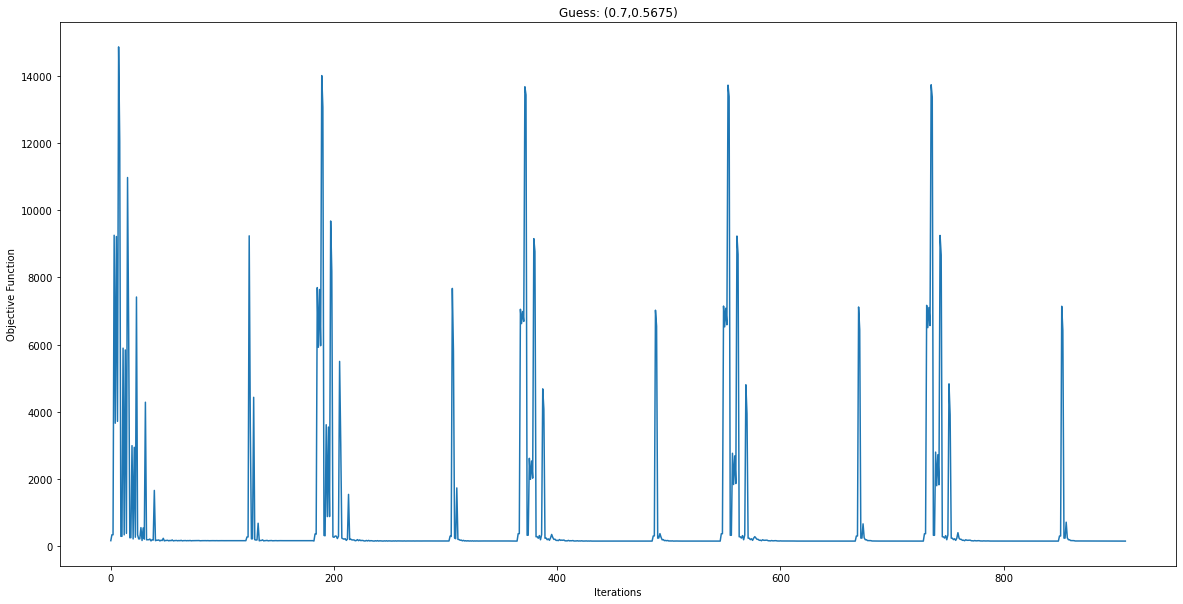

-- It takes 1.458092212677002 seconds to Complete --


-- Genetic Algorithim  --

 The best solution found:
 [0.89935418 0.06507301]

 Objective function:
 139.62033098351313


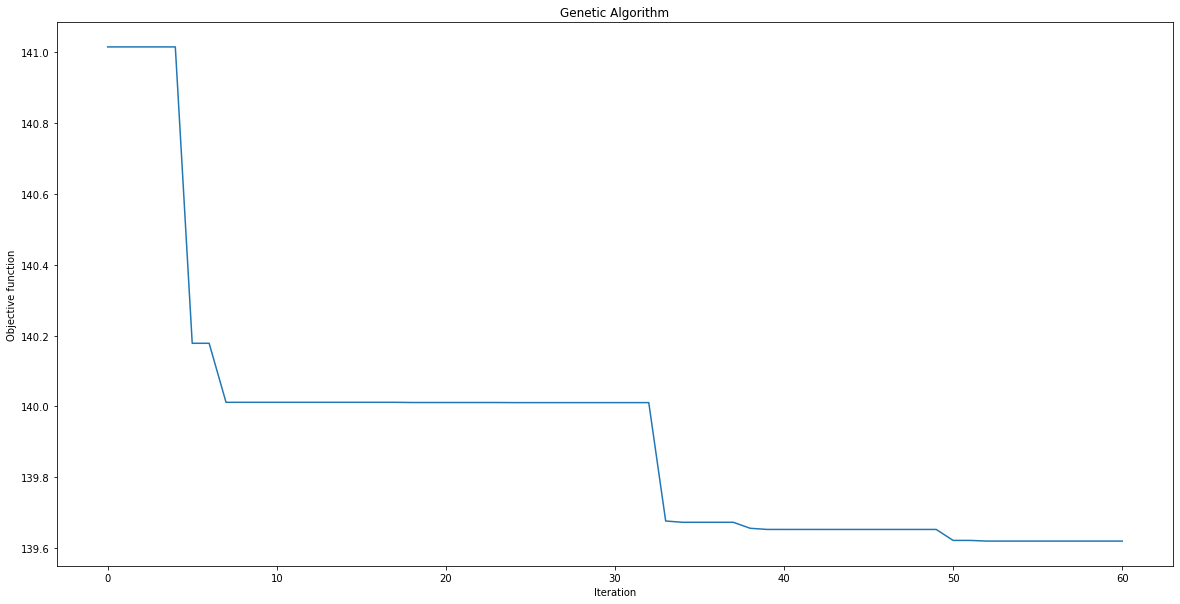

--- It takes 6.385367155075073 seconds to Complete---


Next,

Our guess starting values 0.478 and 0.29 DID NOT CONVERGE.
It returned parameters nan and nan
The maximum likelihood hood function we get is: nan




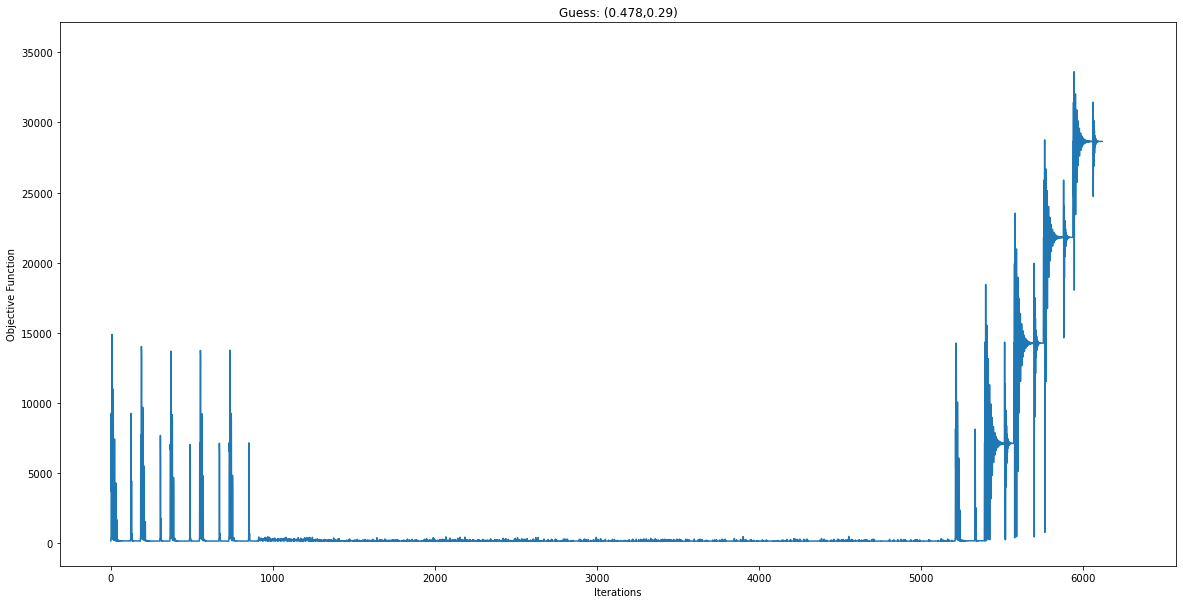

-- It takes 1.5738732814788818 seconds to Complete --


-- Genetic Algorithim  --

 The best solution found:
 [0.89352475 0.0712042 ]

 Objective function:
 139.61404315330668


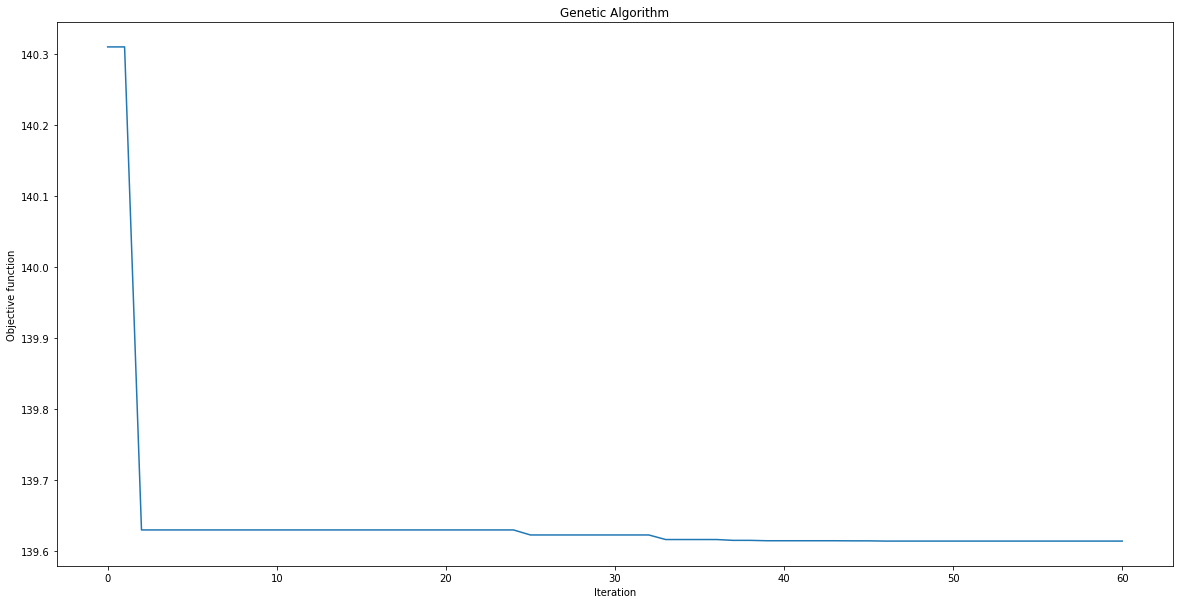

--- It takes 7.125424146652222 seconds to Complete---


Next,

Our guess starting values 0.99 and 0.0001 worked. 
It returned parameters 0.8938129591148569 and 0.0700376750020962
The maximum likelihood hood function we get is: 139.61398337536704




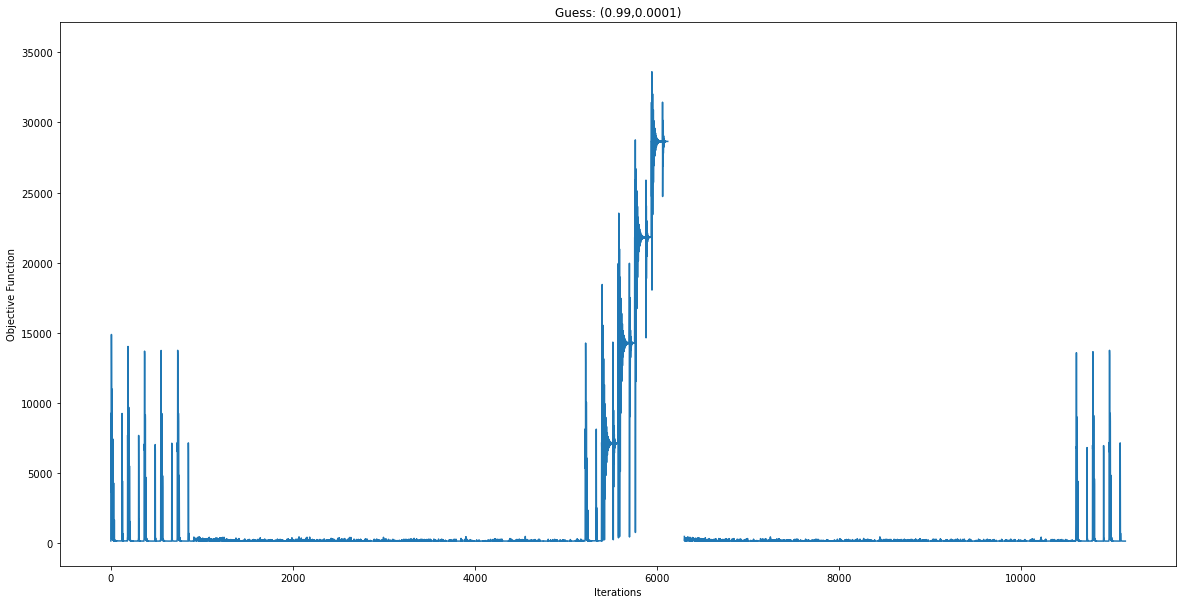

-- It takes 0.940222978591919 seconds to Complete --


-- Genetic Algorithim  --

 The best solution found:
 [0.89519864 0.06785171]

 Objective function:
 139.6144277624178


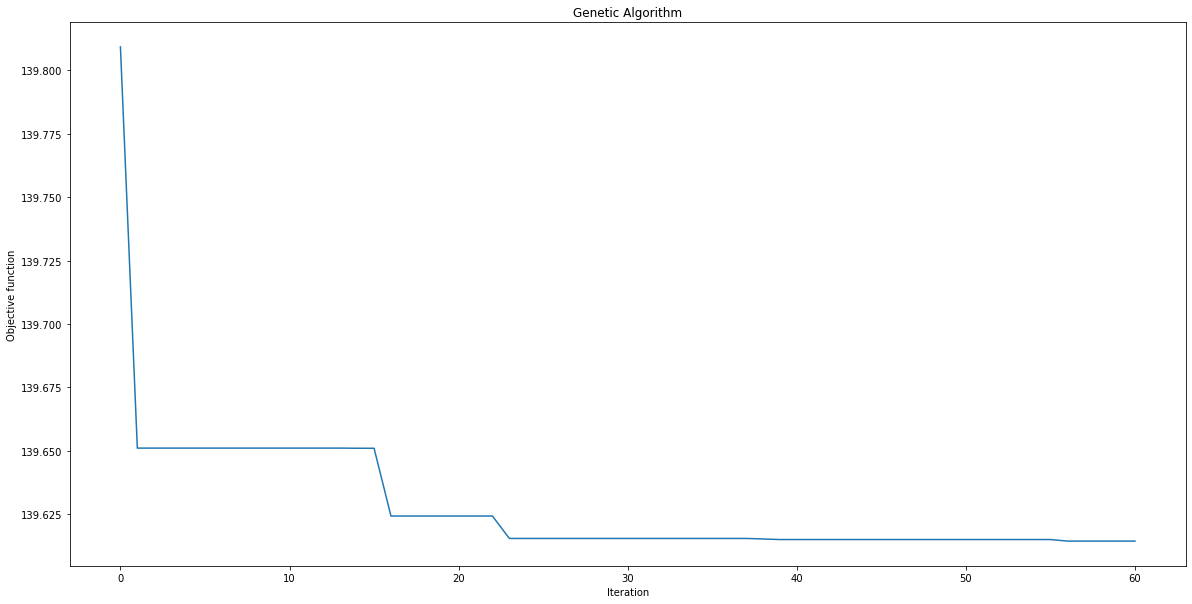

--- It takes 6.957365274429321 seconds to Complete---


Next,

Using a sample size of 500 and True Parameters 0.85 and 0.3

Our guess starting values 0.7 and 0.5675 worked. 
It returned parameters 0.8716596939584932 and 0.22839829110368526
The maximum likelihood hood function we get is: 727.2697518444113




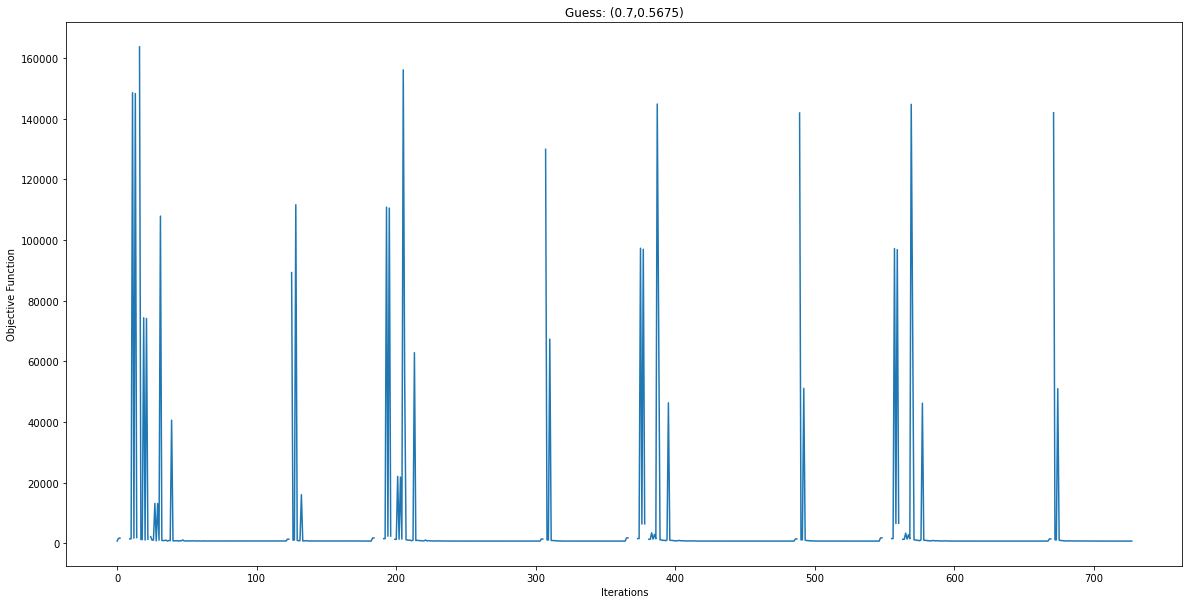

-- It takes 4.384917497634888 seconds to Complete --


-- Genetic Algorithim  --

 The best solution found:
 [0.87638078 0.22831863]

 Objective function:
 727.2923703372297


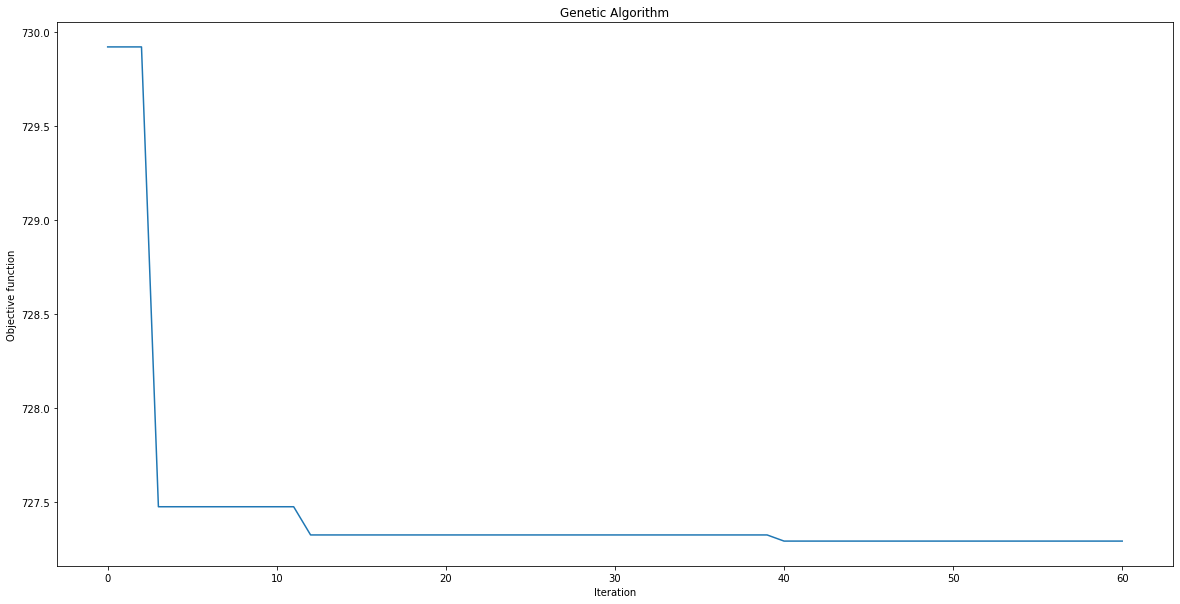

--- It takes 26.033952236175537 seconds to Complete---


Next,

Our guess starting values 0.478 and 0.29 DID NOT CONVERGE.
It returned parameters nan and nan
The maximum likelihood hood function we get is: nan




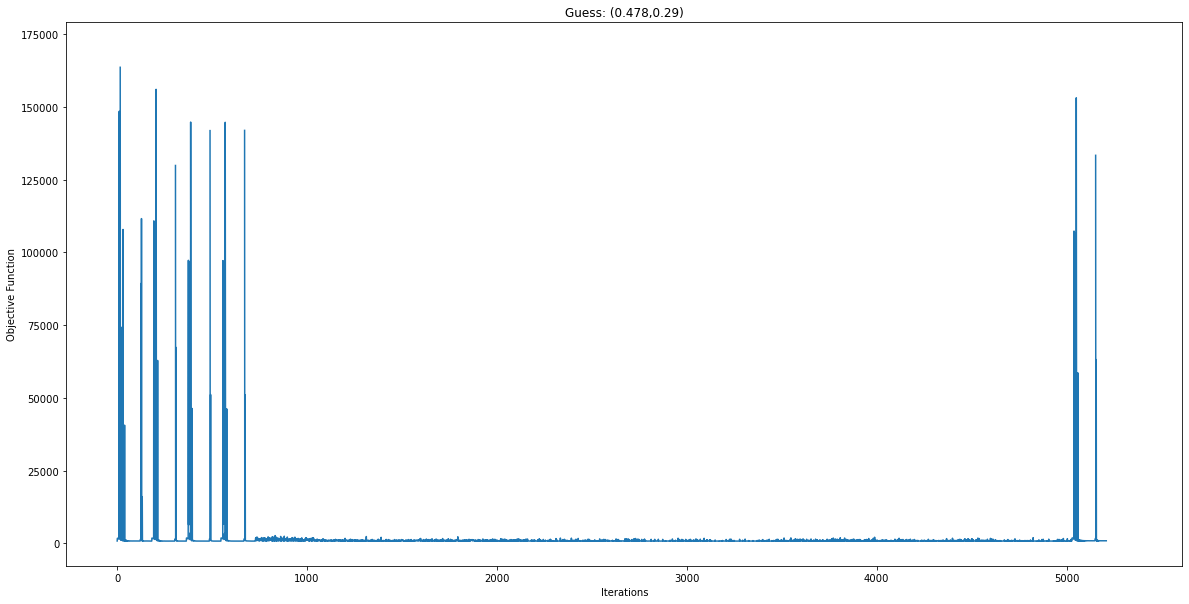

-- It takes 2.4443492889404297 seconds to Complete --


-- Genetic Algorithim  --

 The best solution found:
 [0.87224615 0.22286978]

 Objective function:
 727.2765674699563


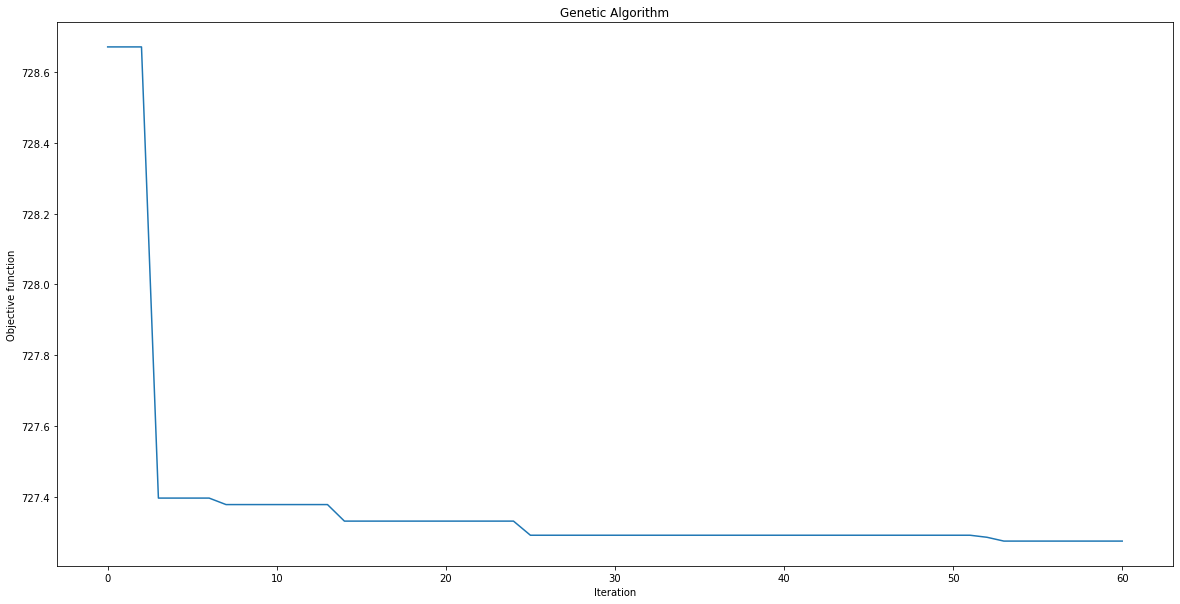

--- It takes 27.189066648483276 seconds to Complete---


Next,

Our guess starting values 0.99 and 0.0001 worked. 
It returned parameters 0.8716596731384975 and 0.22839821194561796
The maximum likelihood hood function we get is: 727.2697027875473




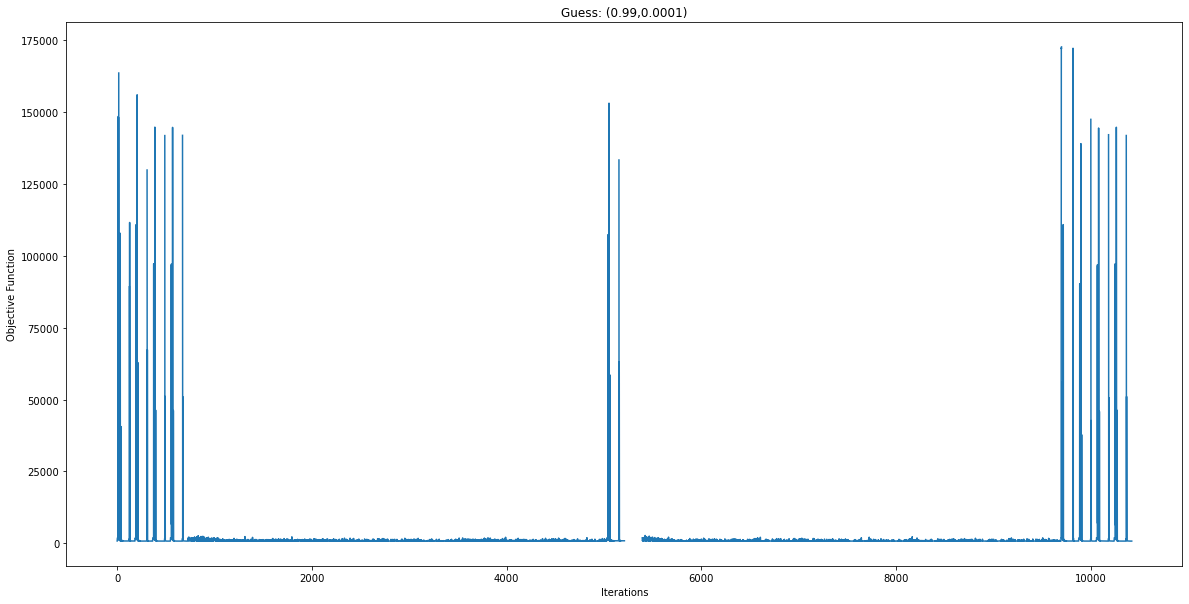

-- It takes 4.100024223327637 seconds to Complete --


-- Genetic Algorithim  --

 The best solution found:
 [0.86951814 0.22476523]

 Objective function:
 727.281045283995


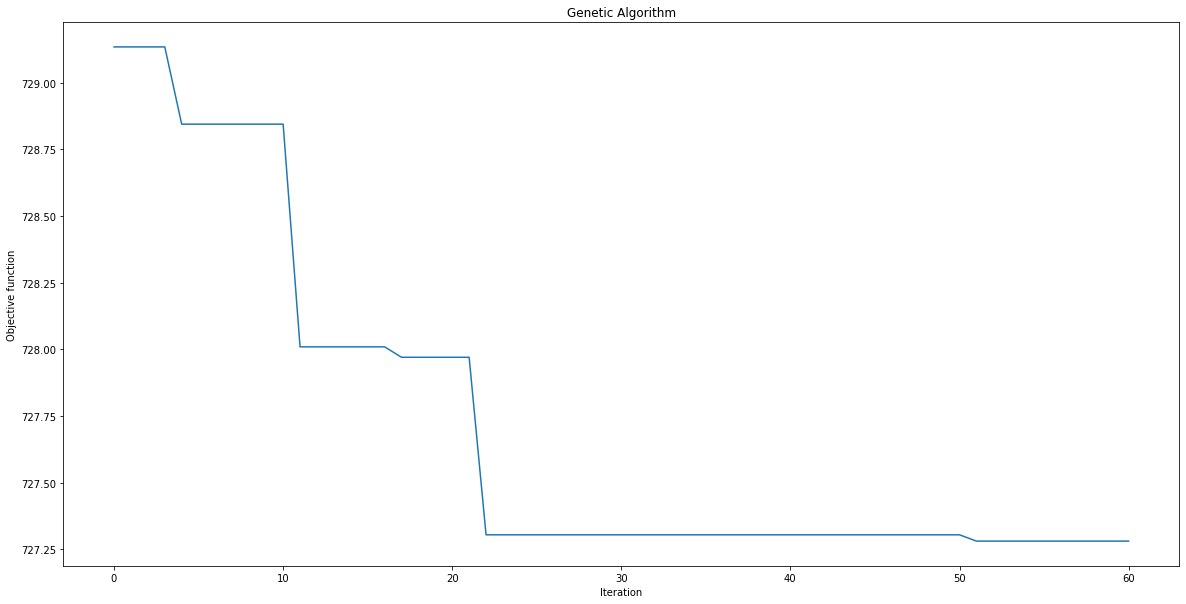

--- It takes 28.704800367355347 seconds to Complete---


Next,



In [10]:
myguess = [(0.7, 0.5675), (0.478, 0.290), (0.99, 0.0001)]
for size in [100, 500]:
    true1 = 0.85
    true2 = 0.3
    print(f"Using a sample size of {size} and True Parameters {true1} and {true2}\n")
    count = 0
    temp = []
    countlist = []
    for k,v in myguess:
        start_time = time.time()
        count += 1
        data = datageneratingprocess(true1, true2, size)
        init = createguess(k,v)
        newtonsolution = newtonraphson(init)
        plt.figure(figsize=(20, 10))
        plt.title(f'Guess: ({k},{v})')
        plt.xlabel("Iterations")
        plt.ylabel("Objective Function")
        if np.isnan(newtonsolution[0]) == False:
            print(f"Our guess starting values {k} and {v} worked. \nIt returned parameters {newtonsolution[0]} and {newtonsolution[1]}\nThe maximum likelihood hood function we get is: {temp[-1]}\n\n")
            plt.plot(temp)
        else:
            print(f"Our guess starting values {k} and {v} DID NOT CONVERGE.\nIt returned parameters {newtonsolution[0]} and {newtonsolution[1]}\nThe maximum likelihood hood function we get is: {temp[-1]}\n\n")
            plt.plot(temp)
        plt.show();

        print("-- It takes %s seconds to Complete --\n\n" % (time.time() - start_time))

        print(f"-- Genetic Algorithim  --\n")
        start_time = time.time()
        geneticalgorithm()
        print("--- It takes %s seconds to Complete---\n\n" % (time.time() - start_time))

        print('Next,\n')





Using a sample size of 100 and True Parameters 0.05 and 0.98

Our guess starting values 0.1 and 0.95 worked. 
It returned parameters -0.10919568082369002 and 0.9550695465811739
The maximum likelihood hood function we get is: 142.78169944176875




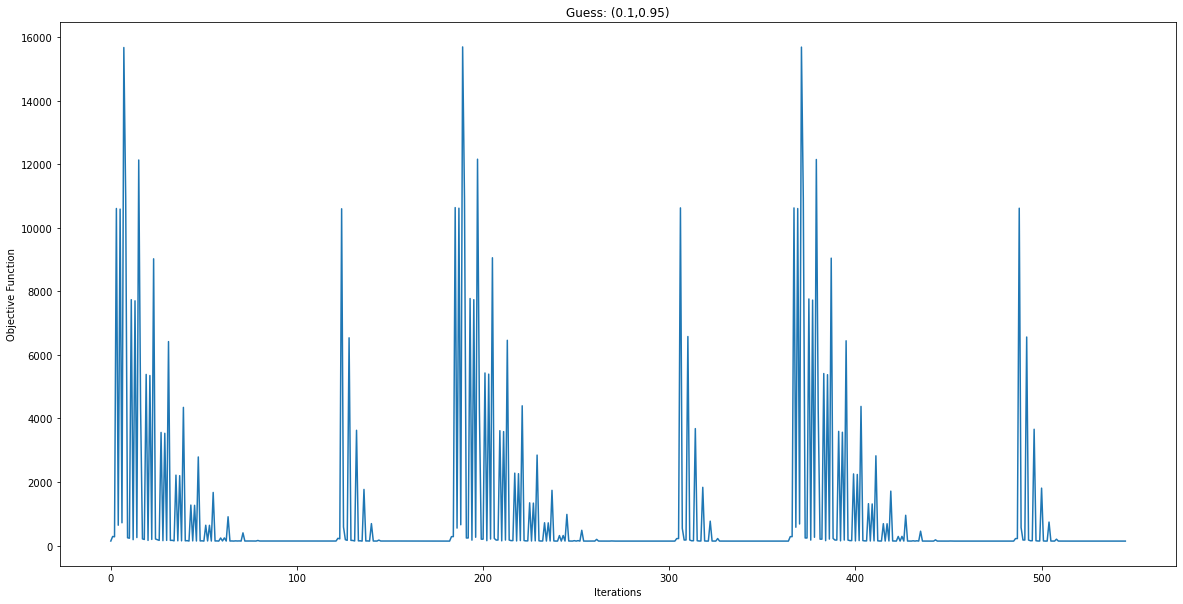

-- It takes 0.93619704246521 seconds to Complete --


-- Genetic Algorithim  --

 The best solution found:
 [-0.1053813   0.94853676]

 Objective function:
 142.79580530685377


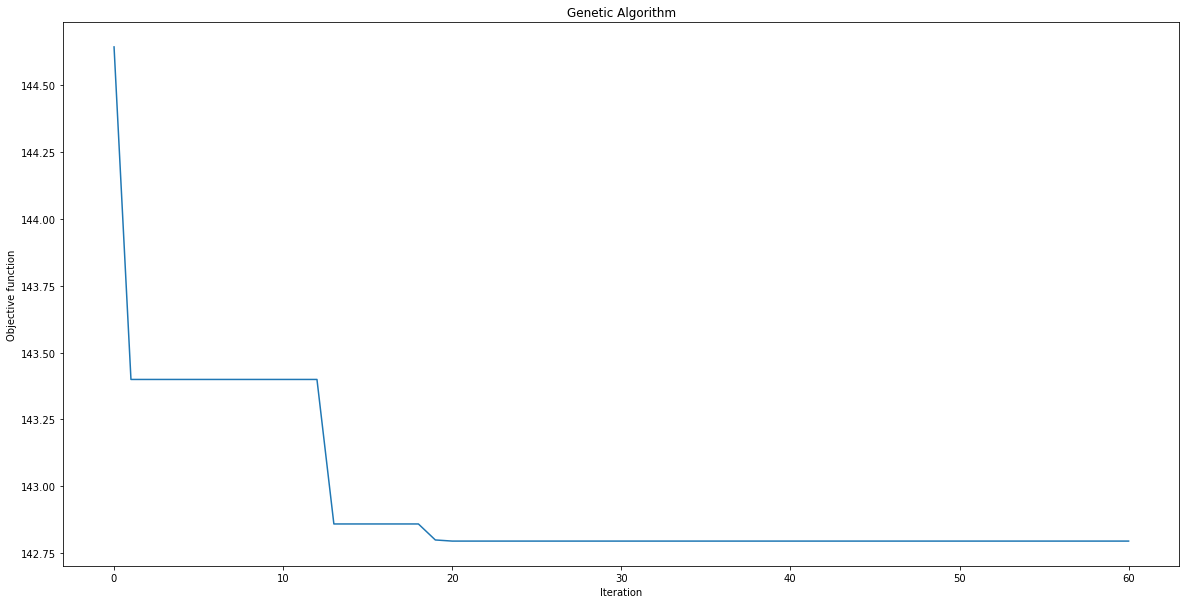

--- It takes 6.854588031768799 seconds to Complete---


Next,

Our guess starting values 0.992 and 0.0679 DID NOT CONVERGE.
It returned parameters nan and nan
The maximum likelihood hood function we get is: nan




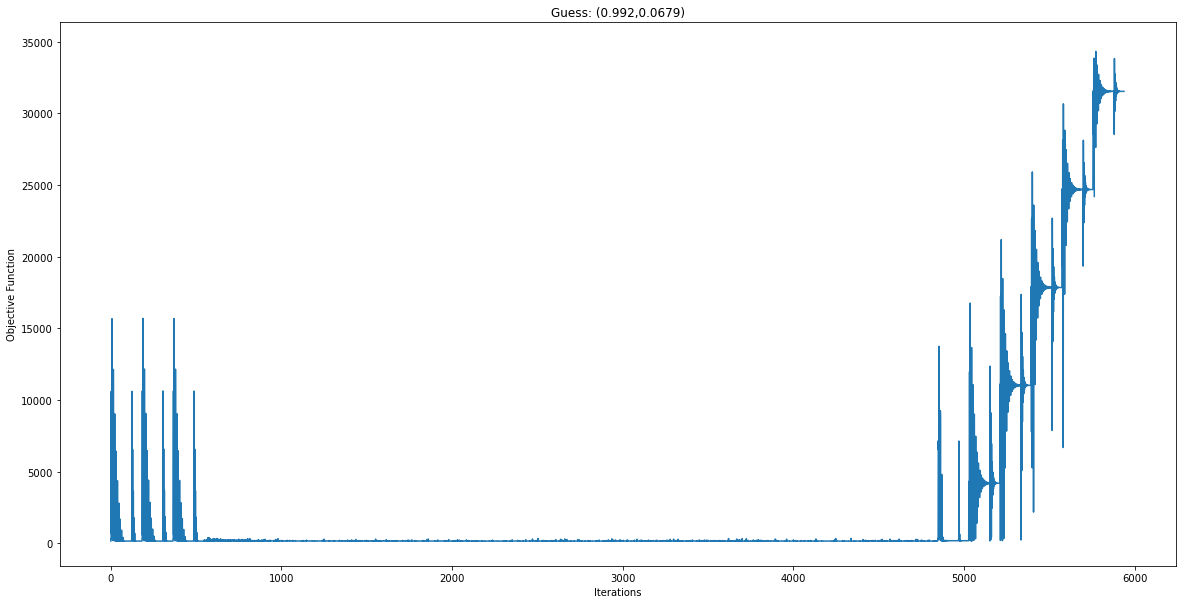

-- It takes 1.810955286026001 seconds to Complete --


-- Genetic Algorithim  --

 The best solution found:
 [-0.10723246  0.95022118]

 Objective function:
 142.78966475272878


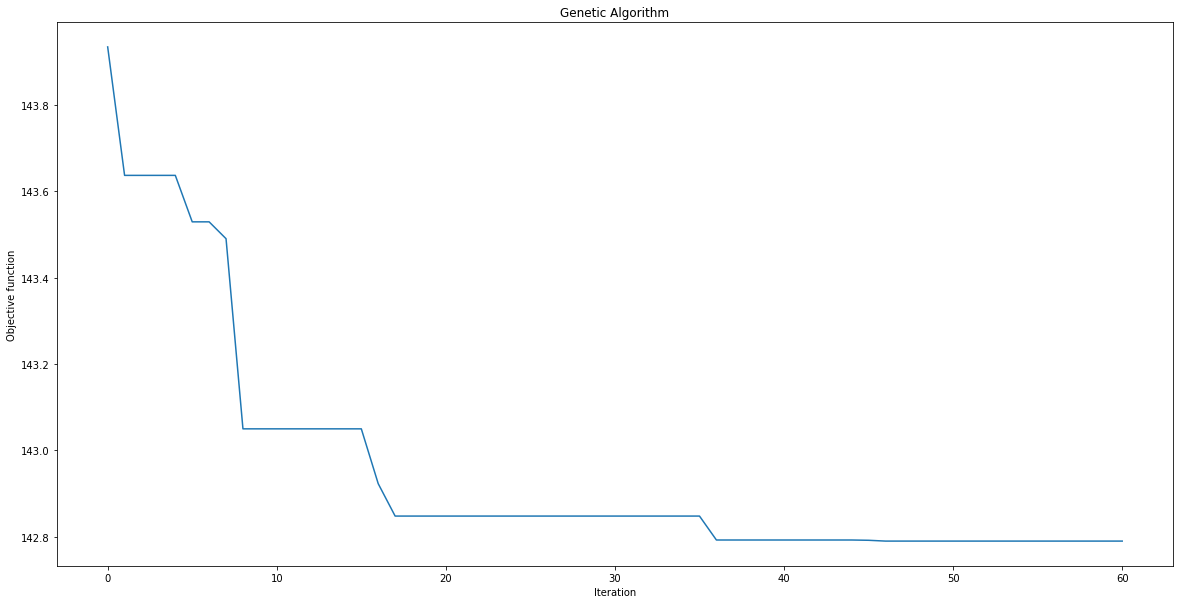

--- It takes 7.169724941253662 seconds to Complete---


Next,

Our guess starting values 0.01 and 0.99 worked. 
It returned parameters -0.10918945892868419 and 0.9550580262817902
The maximum likelihood hood function we get is: 142.78161166402776




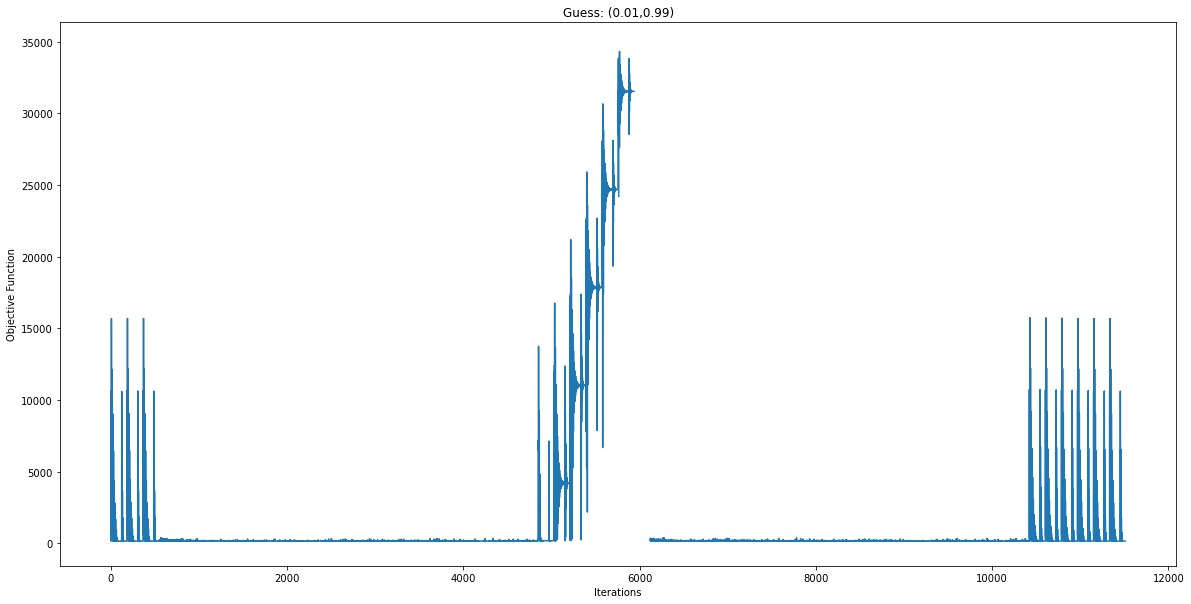

-- It takes 1.5558583736419678 seconds to Complete --


-- Genetic Algorithim  --

 The best solution found:
 [-0.10051944  0.9500201 ]

 Objective function:
 142.79250886681507


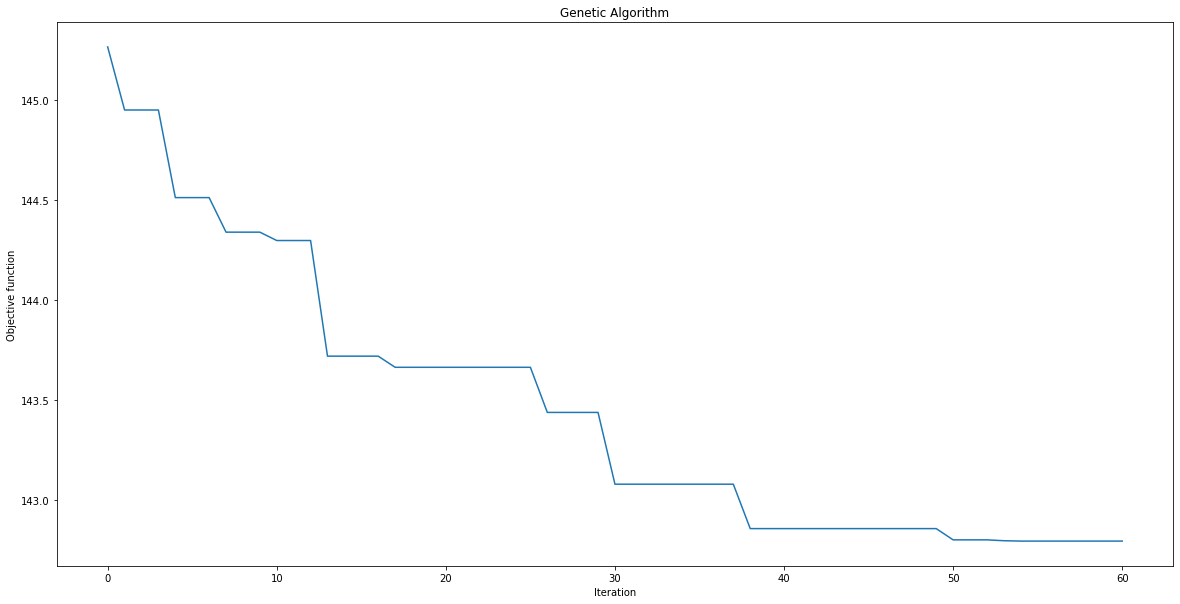

--- It takes 7.5014402866363525 seconds to Complete---


Next,

Using a sample size of 500 and True Parameters 0.05 and 0.98

Our guess starting values 0.1 and 0.95 DID NOT CONVERGE.
It returned parameters nan and nan
The maximum likelihood hood function we get is: nan




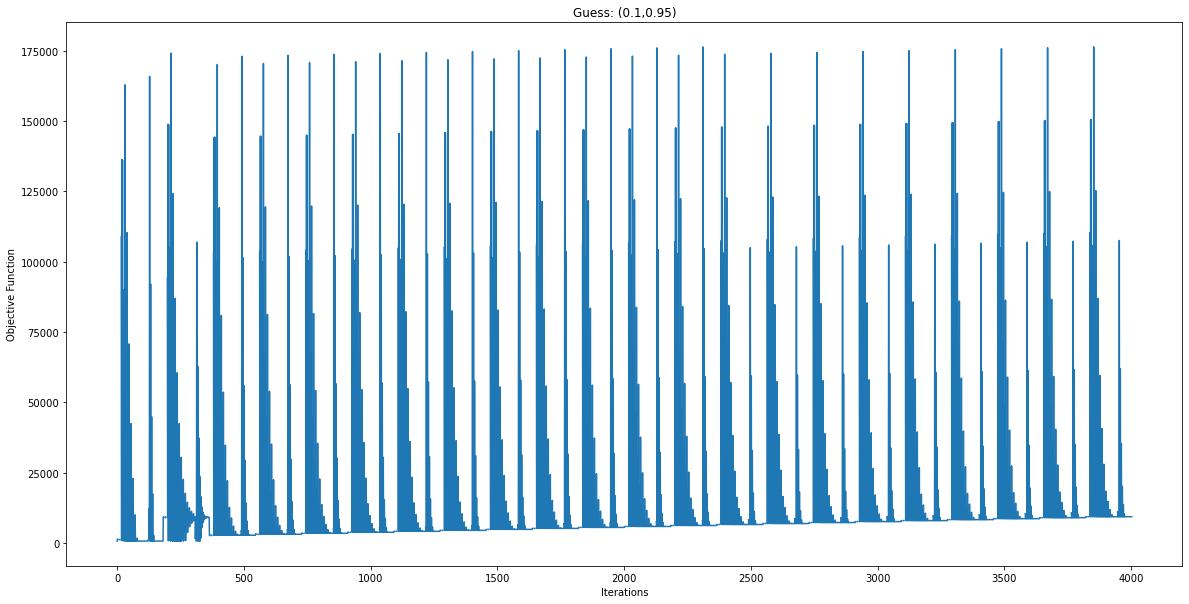

-- It takes 23.09851050376892 seconds to Complete --


-- Genetic Algorithim  --

 The best solution found:
 [0.00738386 0.97595558]

 Objective function:
 730.1843612552939


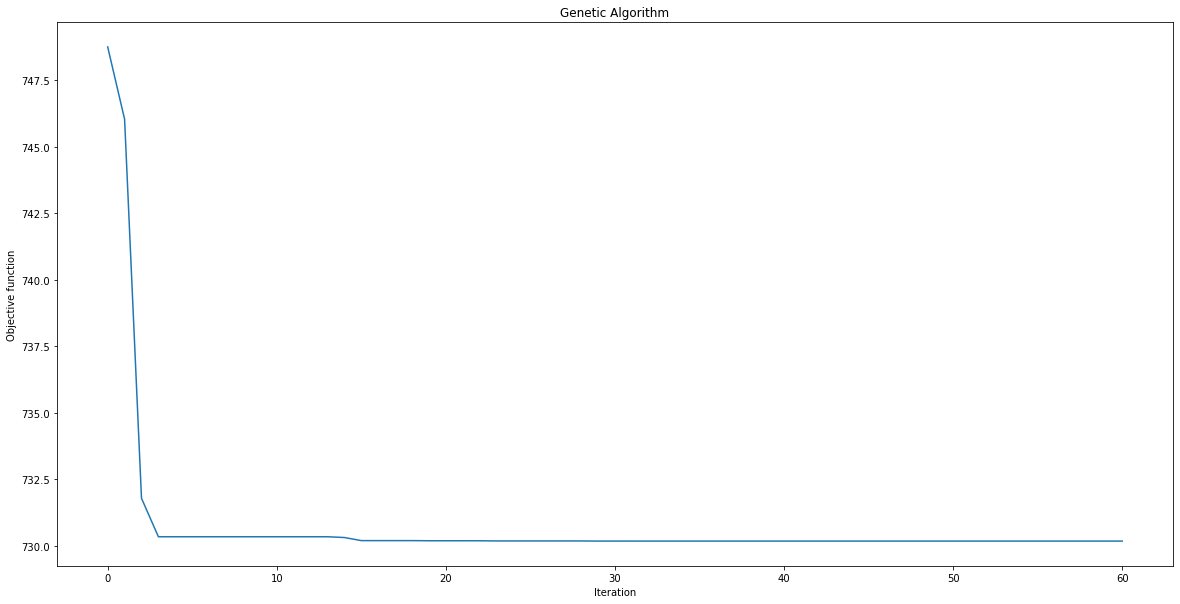

--- It takes 26.220290660858154 seconds to Complete---


Next,

Our guess starting values 0.992 and 0.0679 DID NOT CONVERGE.
It returned parameters nan and nan
The maximum likelihood hood function we get is: nan




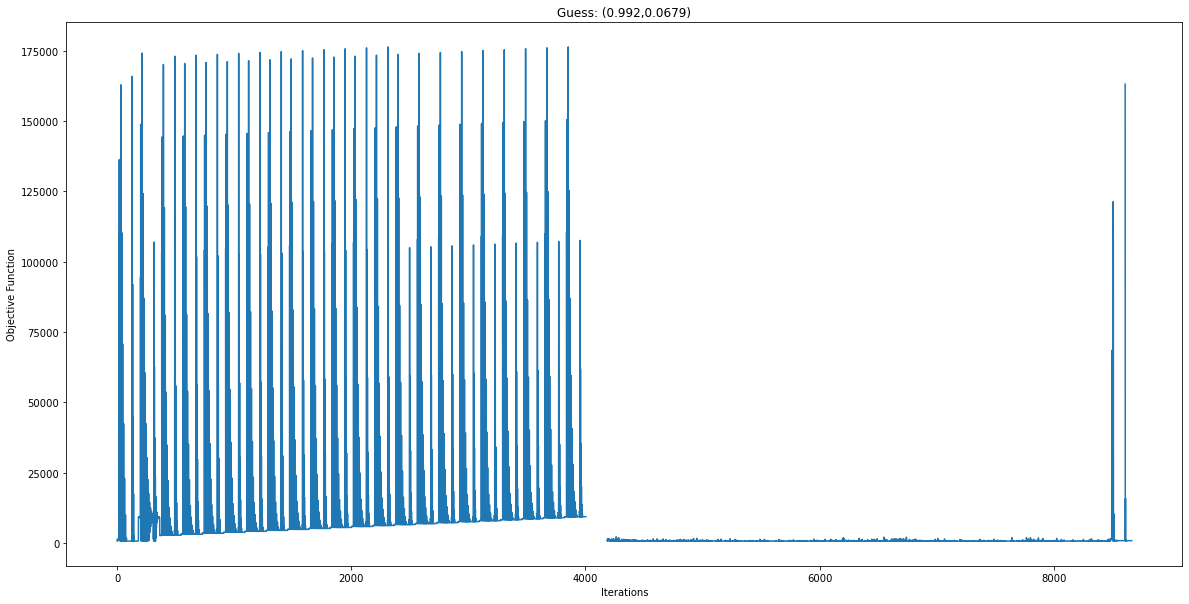

-- It takes 2.240304708480835 seconds to Complete --


-- Genetic Algorithim  --

 The best solution found:
 [0.01389592 0.9696393 ]

 Objective function:
 730.3245046141158


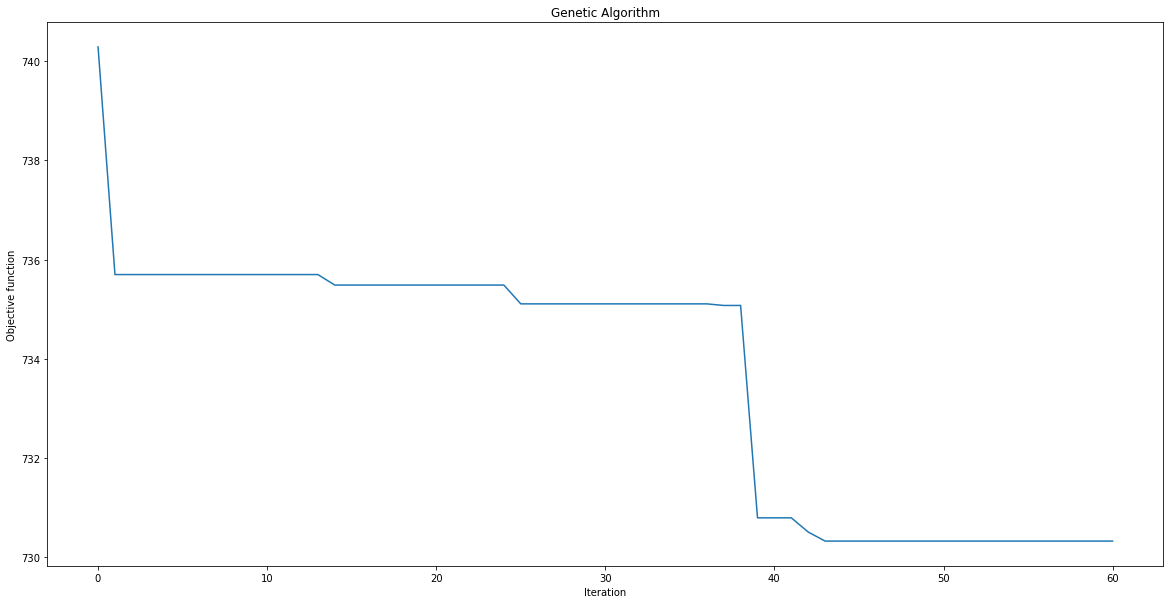

--- It takes 26.025909662246704 seconds to Complete---


Next,

Our guess starting values 0.01 and 0.99 worked. 
It returned parameters 0.00039496932924242754 and 0.9910154919186425
The maximum likelihood hood function we get is: 732.1644050316434




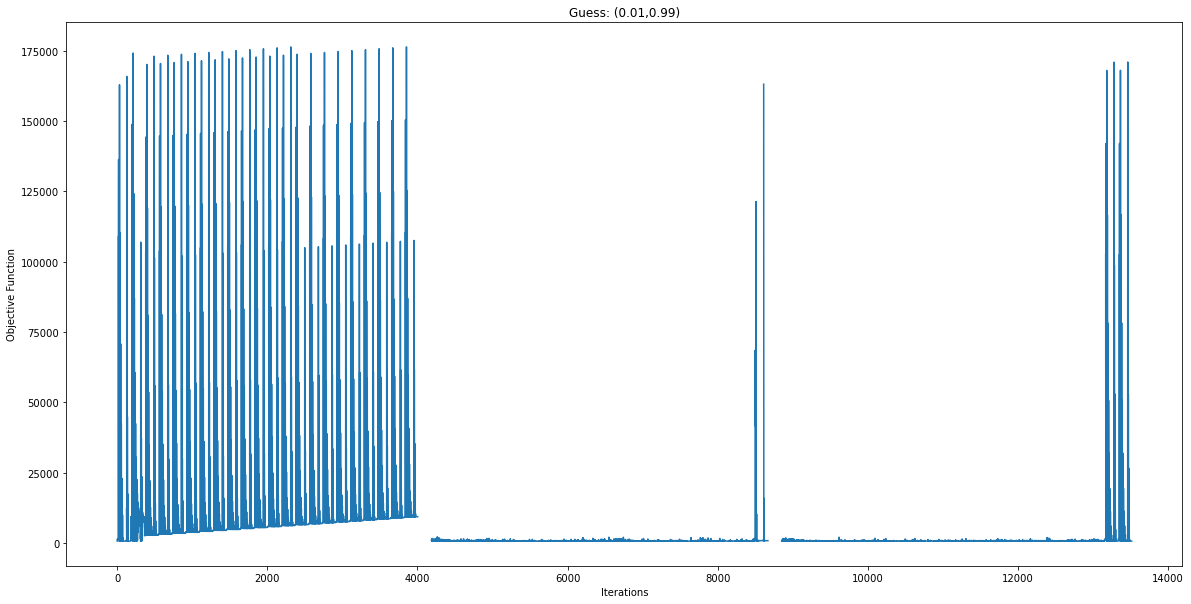

-- It takes 2.294008731842041 seconds to Complete --


-- Genetic Algorithim  --

 The best solution found:
 [0.03154584 0.97436684]

 Objective function:
 730.3006912778886


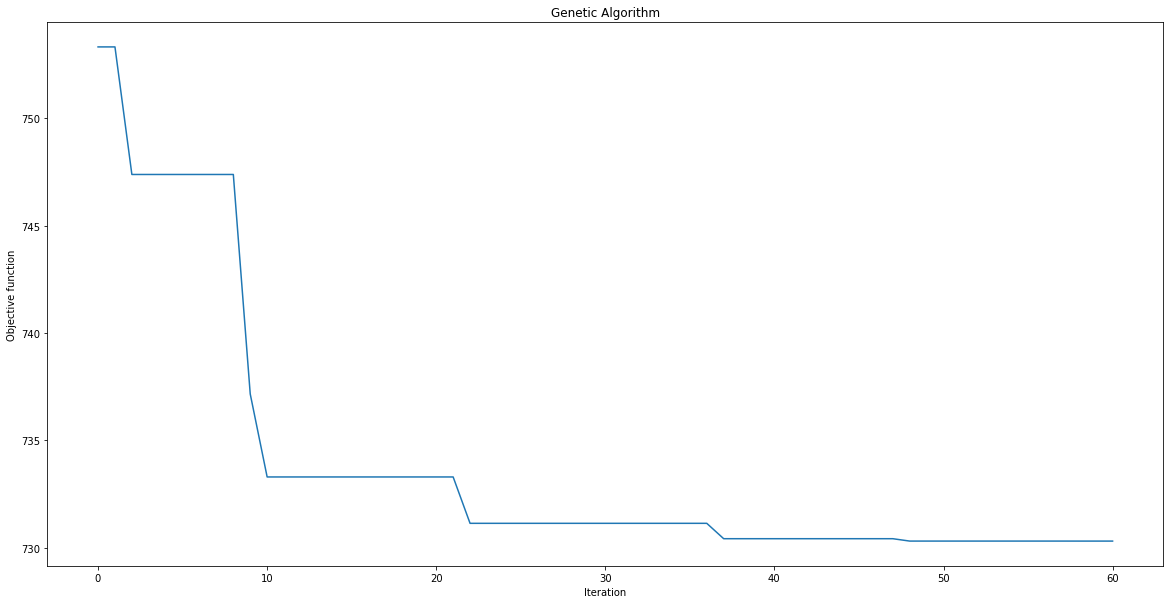

--- It takes 26.073787212371826 seconds to Complete---


Next,



In [11]:
myguess = [(0.1, 0.95), (0.992, 0.0679), (0.01, 0.99)]
for size in [100, 500]:
    true1 = 0.05
    true2 = 0.98
    print(f"Using a sample size of {size} and True Parameters {true1} and {true2}\n")
    count = 0
    temp = []
    countlist = []
    for k,v in myguess:
        start_time = time.time()
        count += 1
        data = datageneratingprocess(true1, true2, size)
        init = createguess(k,v)
        newtonsolution = newtonraphson(init)
        plt.figure(figsize=(20, 10))
        plt.title(f'Guess: ({k},{v})')
        plt.xlabel("Iterations")
        plt.ylabel("Objective Function")
        if np.isnan(newtonsolution[0]) == False:
            print(f"Our guess starting values {k} and {v} worked. \nIt returned parameters {newtonsolution[0]} and {newtonsolution[1]}\nThe maximum likelihood hood function we get is: {temp[-1]}\n\n")
            plt.plot(temp)
        else:
            print(f"Our guess starting values {k} and {v} DID NOT CONVERGE.\nIt returned parameters {newtonsolution[0]} and {newtonsolution[1]}\nThe maximum likelihood hood function we get is: {temp[-1]}\n\n")
            plt.plot(temp)
        plt.show();

        print("-- It takes %s seconds to Complete --\n\n" % (time.time() - start_time))

        print(f"-- Genetic Algorithim  --\n")
        start_time = time.time()
        geneticalgorithm()
        print("--- It takes %s seconds to Complete---\n\n" % (time.time() - start_time))

        print('Next,\n')
    

Using a sample size of 100 and True Parameters 0.98 and 0.05

Our guess starting values 1 and 0 worked. 
It returned parameters 0.9516156660874799 and -0.09574537196528393
The maximum likelihood hood function we get is: 139.65186346635585




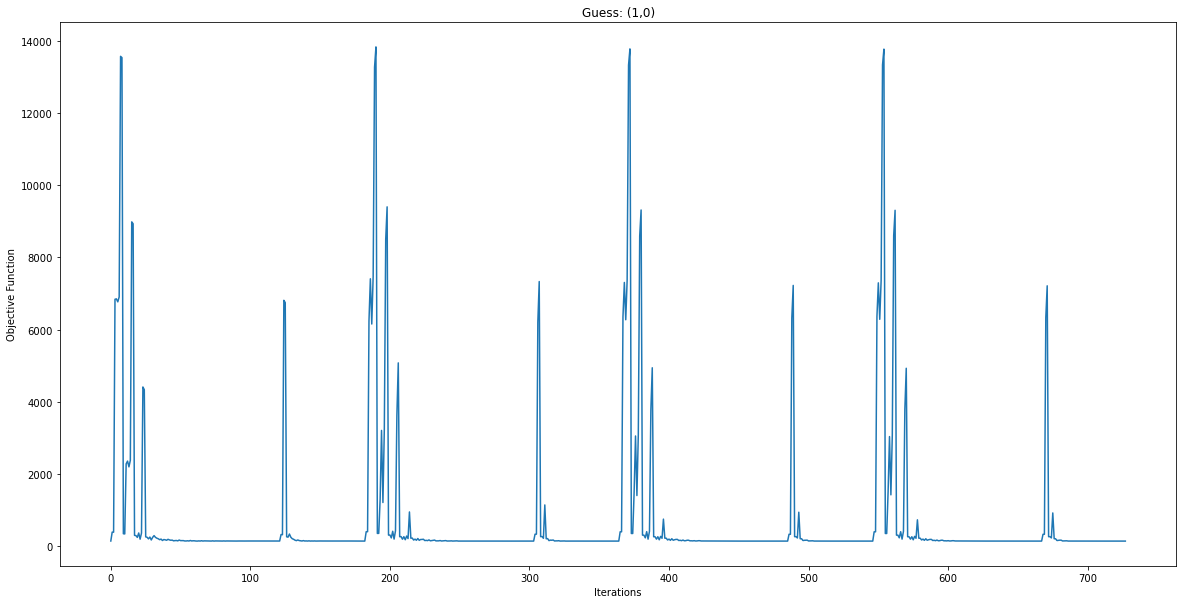

-- It takes 1.544569492340088 seconds to Complete --


-- Genetic Algorithim  --

 The best solution found:
 [ 0.94487955 -0.09229203]

 Objective function:
 139.67407278963583


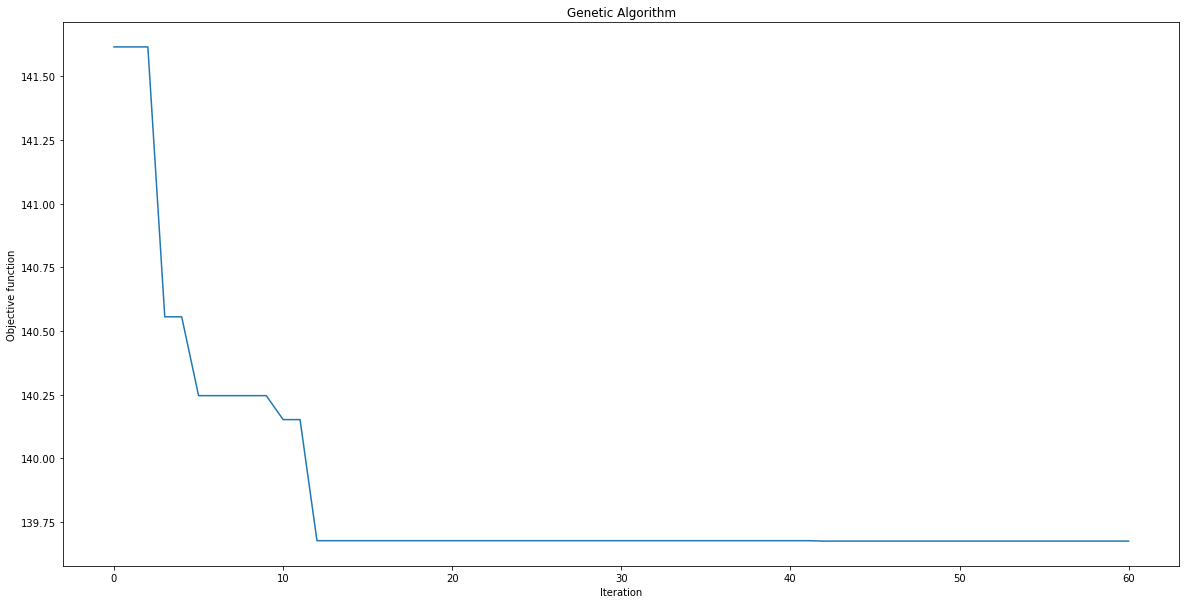

--- It takes 9.993656873703003 seconds to Complete---


Next,

Our guess starting values 0 and 1 DID NOT CONVERGE.
It returned parameters nan and nan
The maximum likelihood hood function we get is: 35395.743736095756




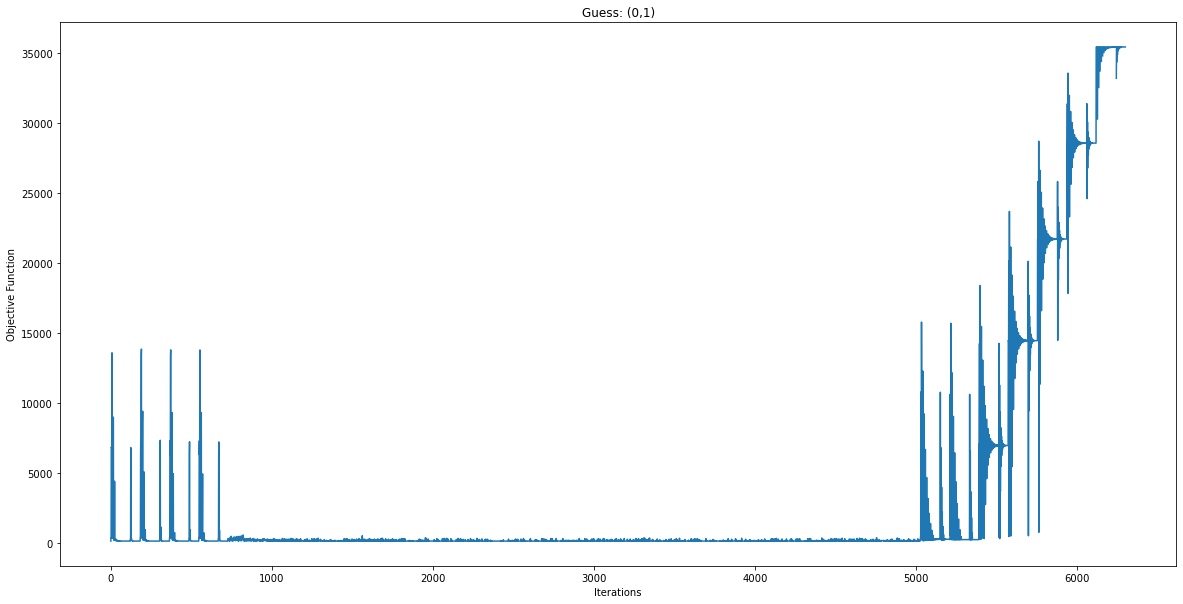

-- It takes 2.085416555404663 seconds to Complete --


-- Genetic Algorithim  --

 The best solution found:
 [ 0.94639966 -0.1065373 ]

 Objective function:
 139.68051831681436


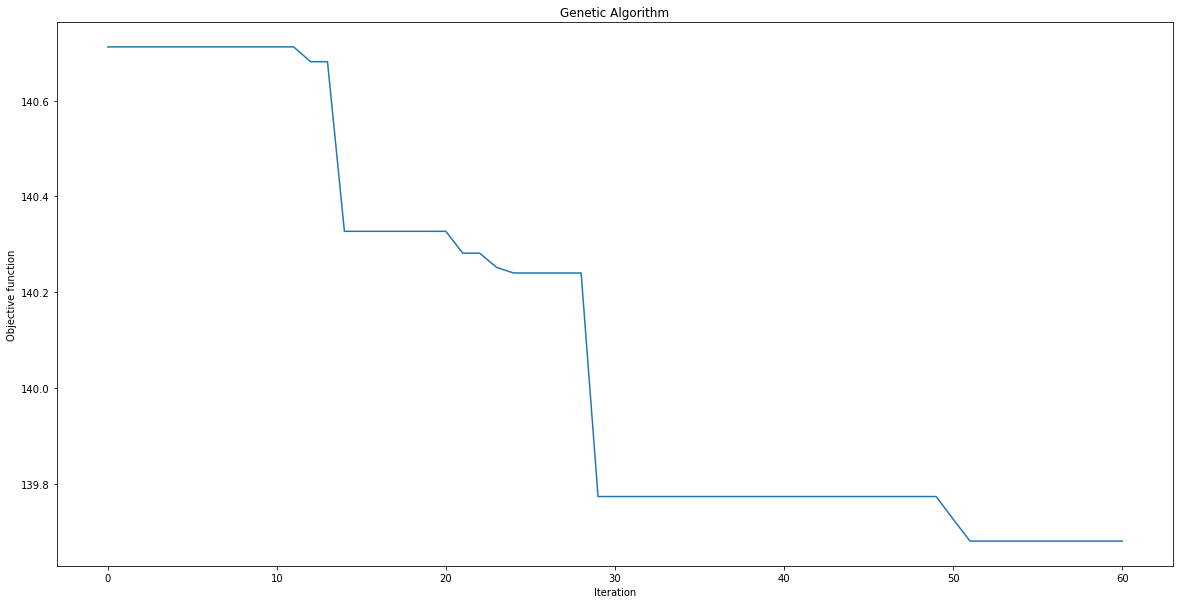

--- It takes 10.128063201904297 seconds to Complete---


Next,

Our guess starting values 0.9 and 0.004 worked. 
It returned parameters 0.9516156666174066 and -0.09574537307083487
The maximum likelihood hood function we get is: 139.65186363008667




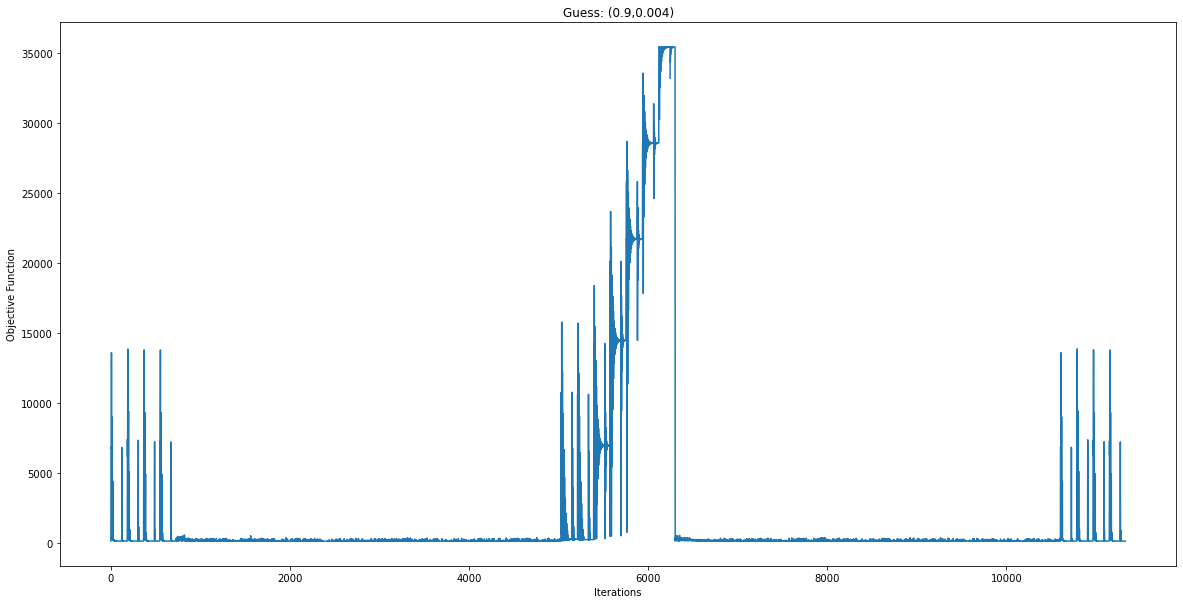

-- It takes 1.400224208831787 seconds to Complete --


-- Genetic Algorithim  --

 The best solution found:
 [ 0.95183246 -0.09757819]

 Objective function:
 139.65206428783432


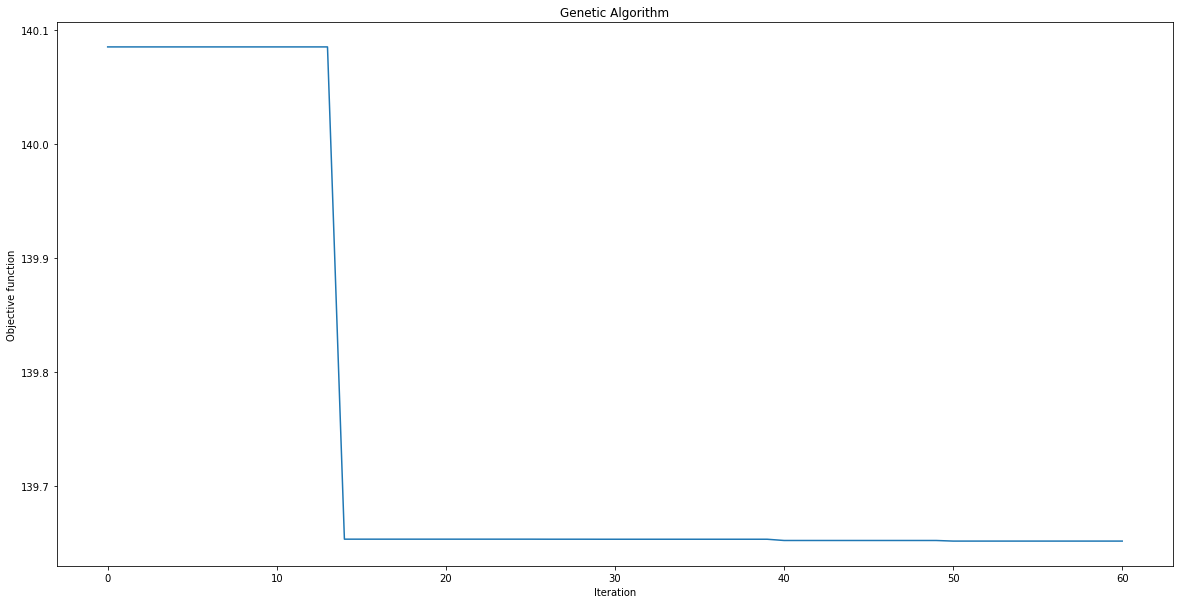

--- It takes 10.109924077987671 seconds to Complete---


Next,

Using a sample size of 500 and True Parameters 0.98 and 0.05

Our guess starting values 1 and 0 worked. 
It returned parameters 0.9805664457663286 and 0.0006216117509846612
The maximum likelihood hood function we get is: 727.4619983407795




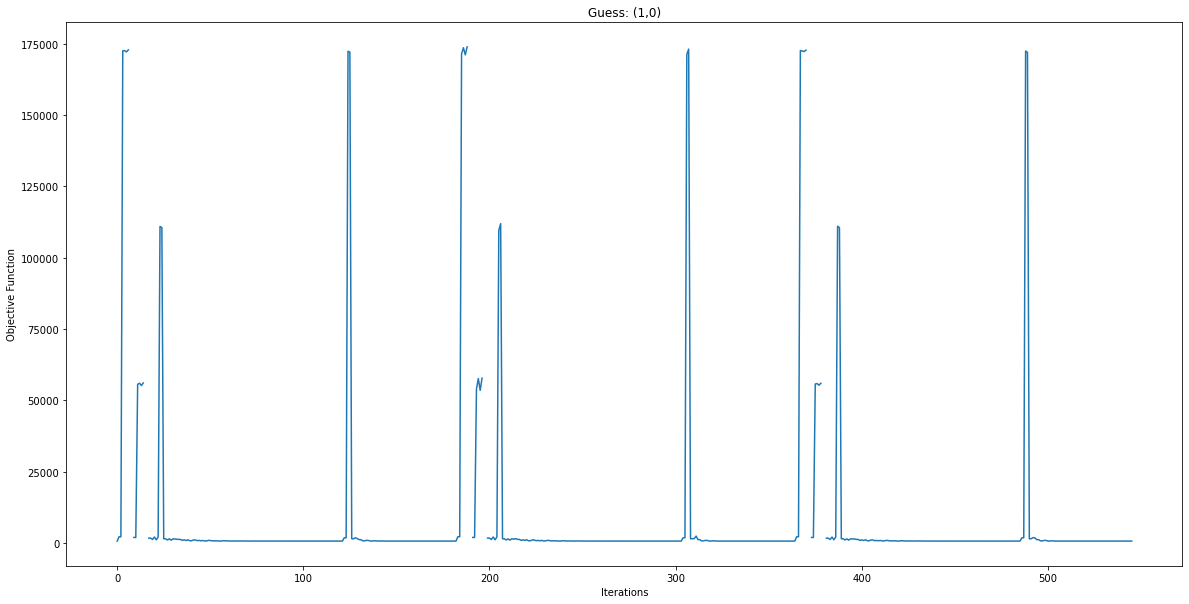

-- It takes 3.9135358333587646 seconds to Complete --


-- Genetic Algorithim  --

 The best solution found:
 [0.97152234 0.01196838]

 Objective function:
 727.9590850551183


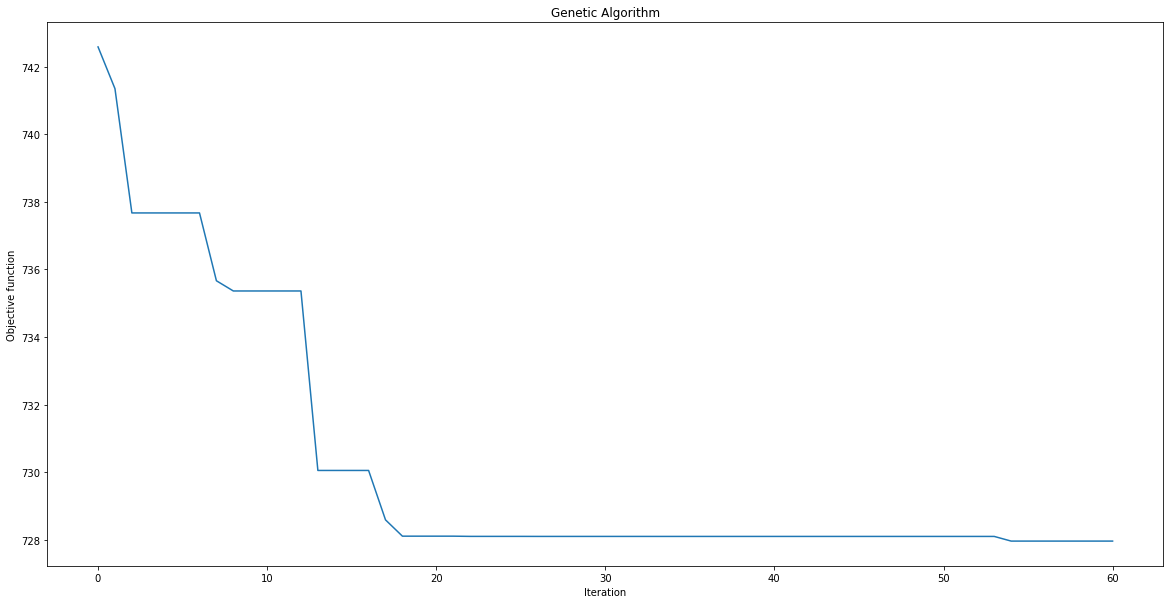

--- It takes 35.526955127716064 seconds to Complete---


Next,



LinAlgError: Singular matrix

In [10]:
myguess = [(1,0),(0,1),(0.9,0.004)]
for size in [100, 500]:
    true1 = 0.98
    true2 = 0.05
    print(f"Using a sample size of {size} and True Parameters {true1} and {true2}\n")
    count = 0
    temp = []
    countlist = []
    for k,v in myguess:
        start_time = time.time()
        count += 1
        data = datageneratingprocess(true1, true2, size)
        init = createguess(k,v)
        newtonsolution = newtonraphson(init)
        plt.figure(figsize=(20, 10))
        plt.title(f'Guess: ({k},{v})')
        plt.xlabel("Iterations")
        plt.ylabel("Objective Function")
        if np.isnan(newtonsolution[0]) == False:
            print(f"Our guess starting values {k} and {v} worked. \nIt returned parameters {newtonsolution[0]} and {newtonsolution[1]}\nThe maximum likelihood hood function we get is: {temp[-1]}\n\n")
            plt.plot(temp)
        else:
            print(f"Our guess starting values {k} and {v} DID NOT CONVERGE.\nIt returned parameters {newtonsolution[0]} and {newtonsolution[1]}\nThe maximum likelihood hood function we get is: {temp[-1]}\n\n")
            plt.plot(temp)
        plt.show();

        print("-- It takes %s seconds to Complete --\n\n" % (time.time() - start_time))

        print(f"-- Genetic Algorithim  --\n")
        start_time = time.time()
        geneticalgorithm()
        print("--- It takes %s seconds to Complete---\n\n" % (time.time() - start_time))

        print('Next,\n')



### Note
We see that our algorithim stops and is singular at T = 500 with a guess of 0, 1

Using a sample size of 100 and True Parameters -0.65 and 0.65

Our guess starting values -0.25 and 0 worked. 
It returned parameters -0.23101363645394654 and 0.04836736379734253
The maximum likelihood hood function we get is: 139.96327650273065




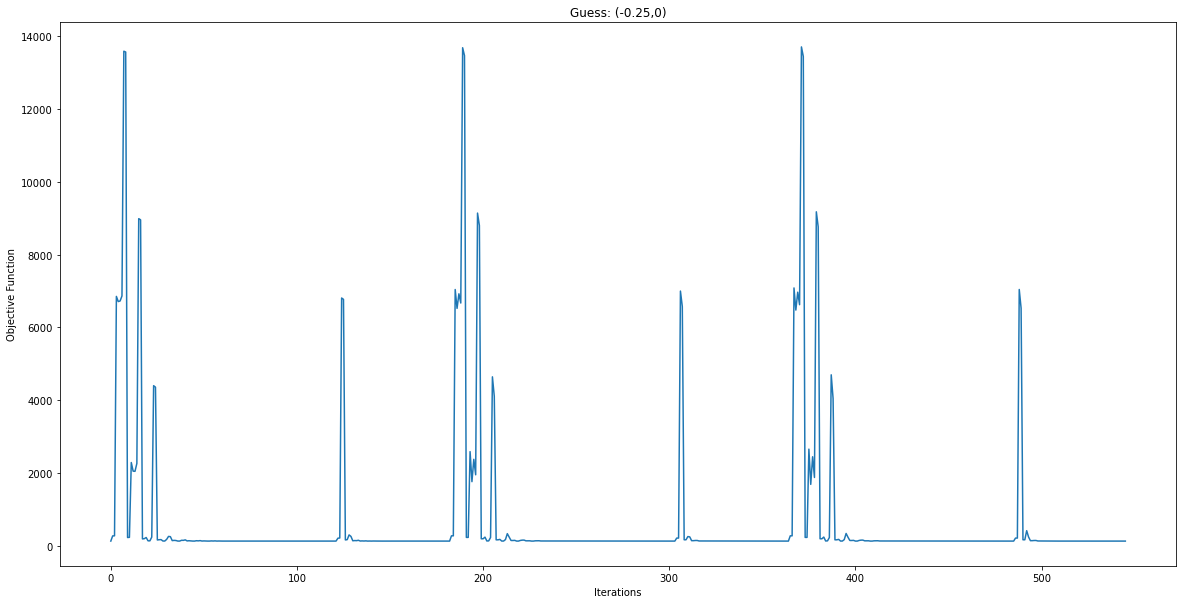

-- It takes 1.0519301891326904 seconds to Complete --


-- Genetic Algorithim  --

 The best solution found:
 [-0.10140357 -0.08316684]

 Objective function:
 140.0299349517286


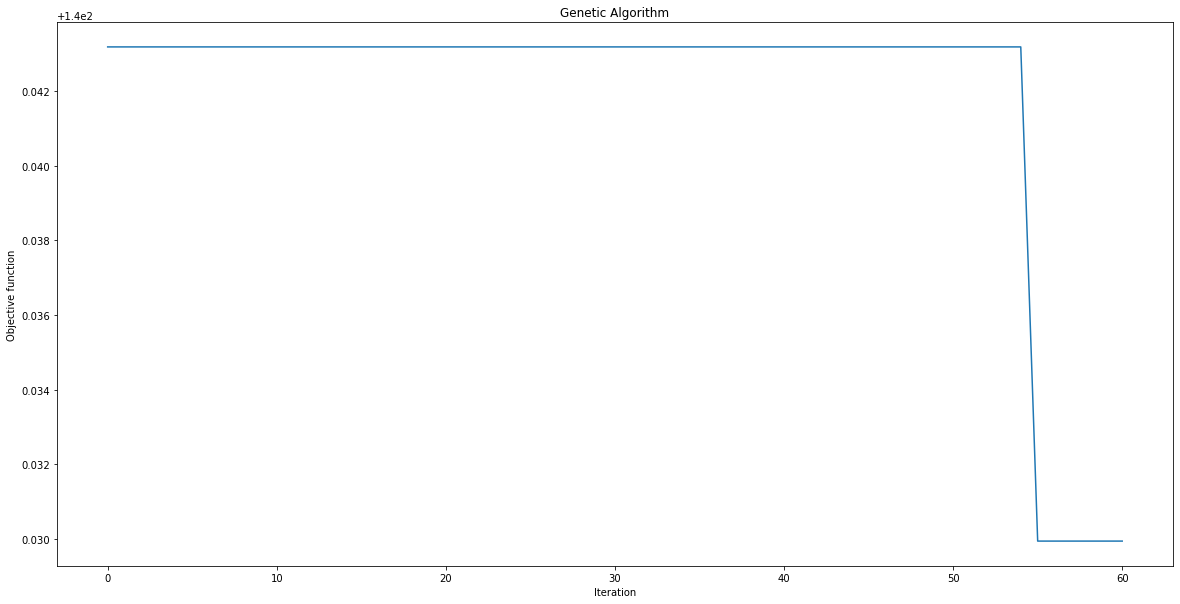

--- It takes 6.110800743103027 seconds to Complete---


Next,

Our guess starting values -0.5 and 0 worked. 
It returned parameters -0.2310143860710717 and 0.04836801518565248
The maximum likelihood hood function we get is: 139.96327933605585




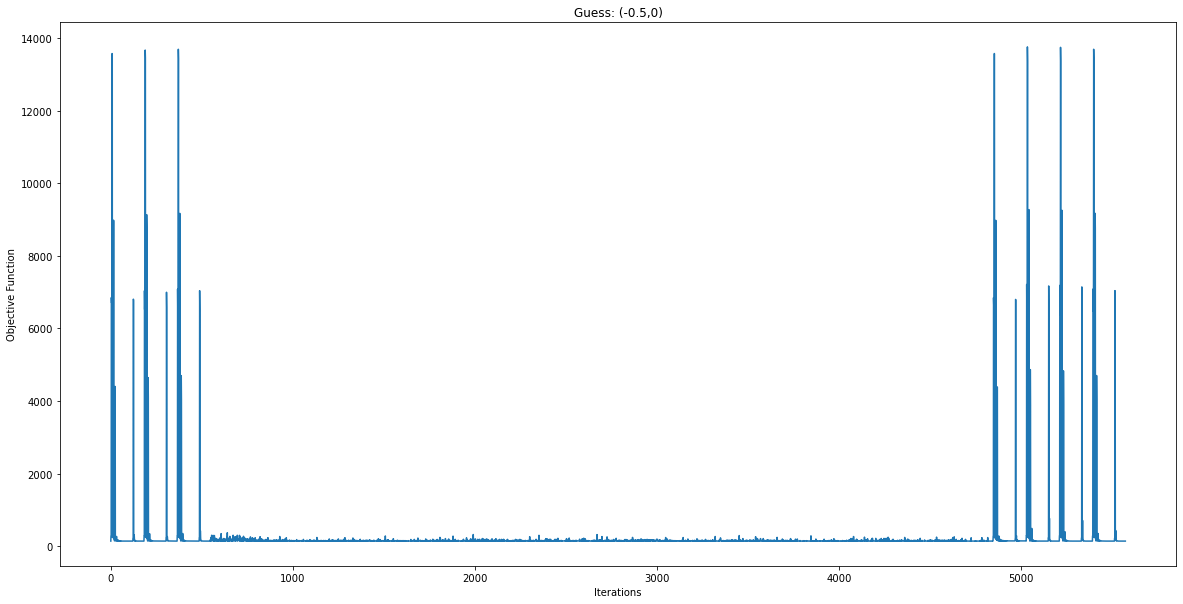

-- It takes 1.0053749084472656 seconds to Complete --


-- Genetic Algorithim  --

 The best solution found:
 [-0.26891499  0.08338827]

 Objective function:
 139.9684500470023


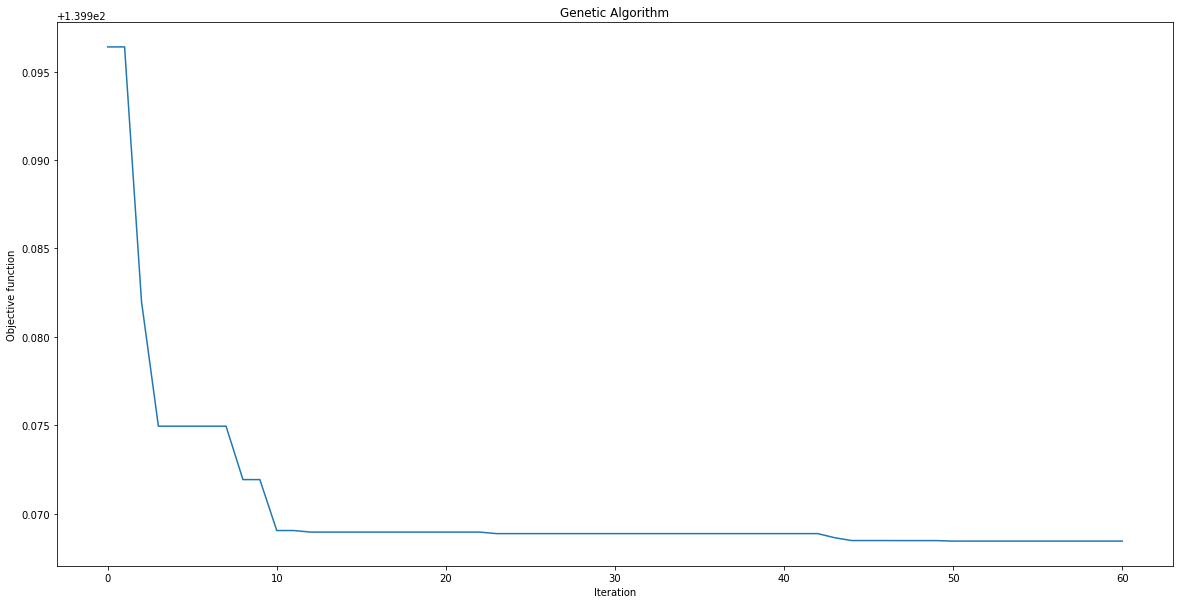

--- It takes 6.743366956710815 seconds to Complete---


Next,

Our guess starting values 0.5 and -0.5 DID NOT CONVERGE.
It returned parameters nan and nan
The maximum likelihood hood function we get is: nan




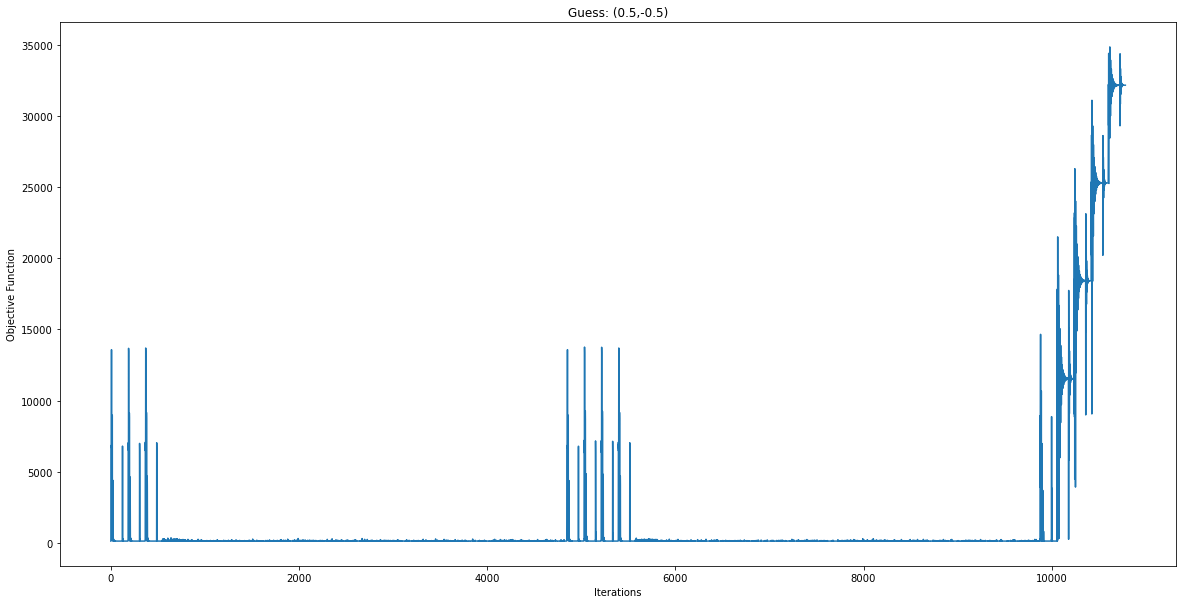

-- It takes 1.6601924896240234 seconds to Complete --


-- Genetic Algorithim  --

 The best solution found:
 [-0.22297803  0.04105633]

 Objective function:
 139.96349872748493


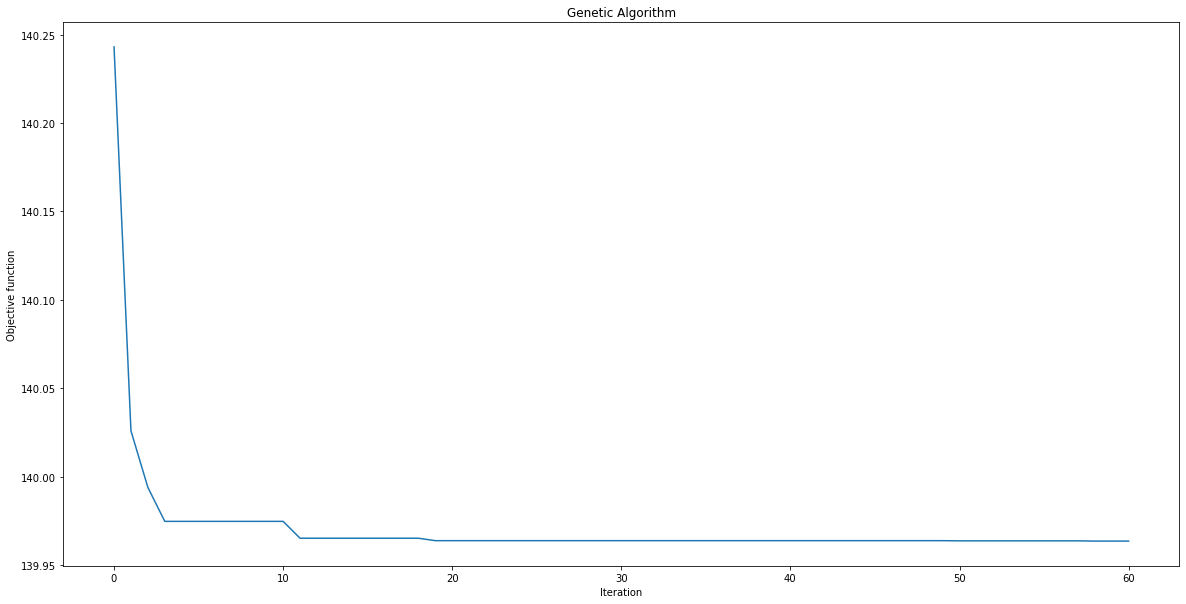

--- It takes 7.6660449504852295 seconds to Complete---


Next,

Using a sample size of 500 and True Parameters -0.65 and 0.65

Our guess starting values -0.25 and 0 worked. 
It returned parameters -0.017224552119793013 and -0.03024299660511358
The maximum likelihood hood function we get is: 727.4617193498774




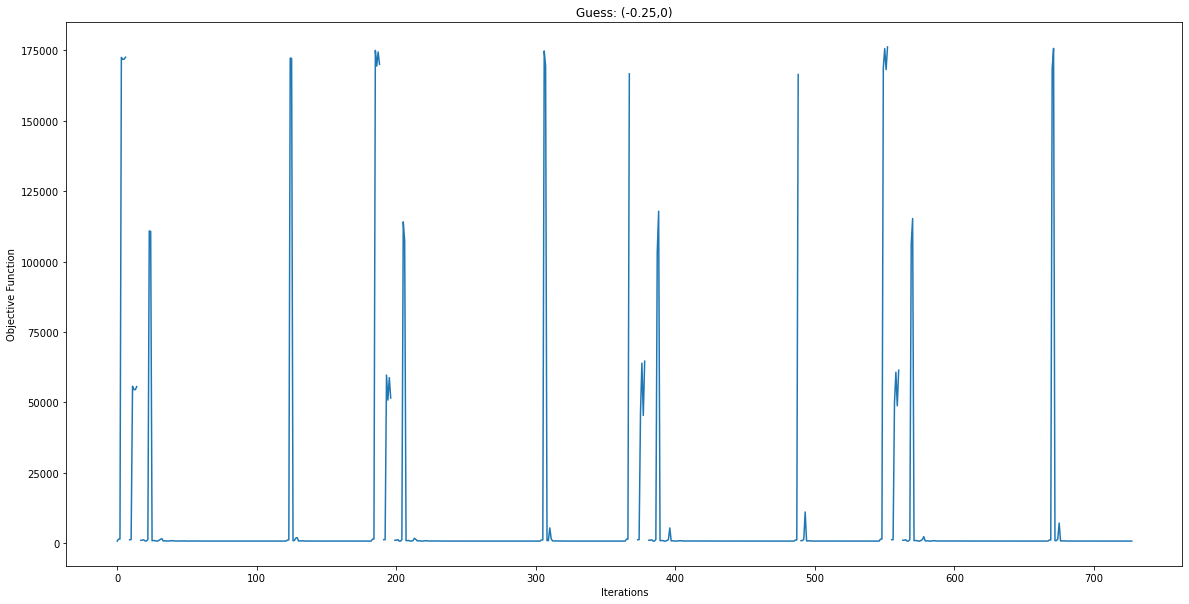

-- It takes 4.17776346206665 seconds to Complete --


-- Genetic Algorithim  --

 The best solution found:
 [-0.03939793 -0.00855588]

 Objective function:
 727.4627969728253


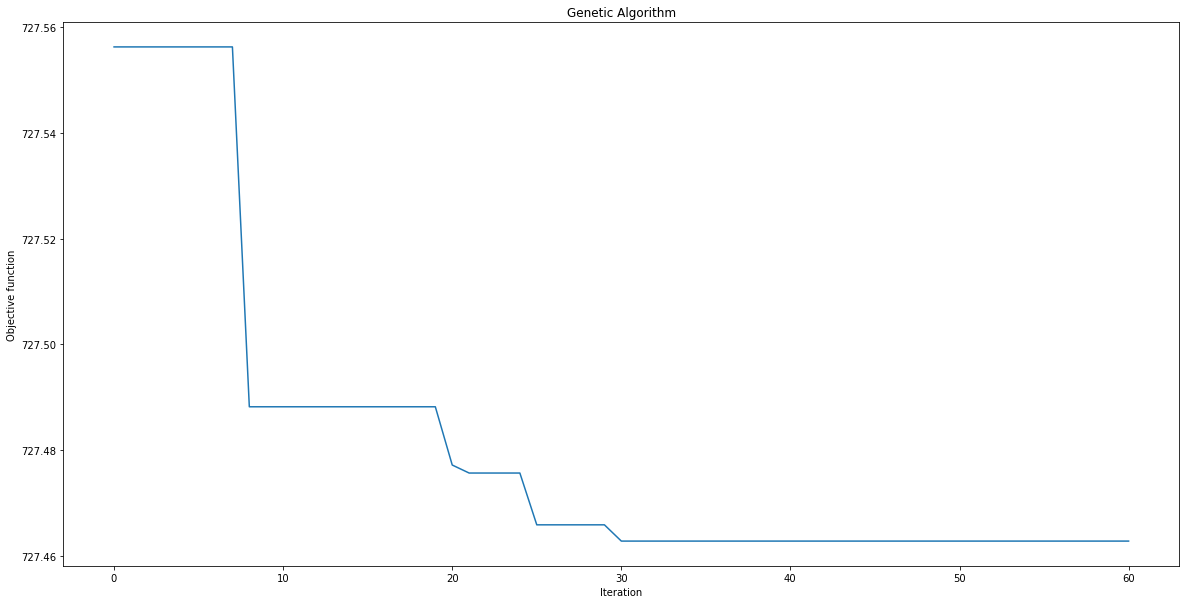

--- It takes 25.505217790603638 seconds to Complete---


Next,

Our guess starting values -0.5 and 0 worked. 
It returned parameters -0.017224252724414222 and -0.030243277179509264
The maximum likelihood hood function we get is: 727.4617174237255




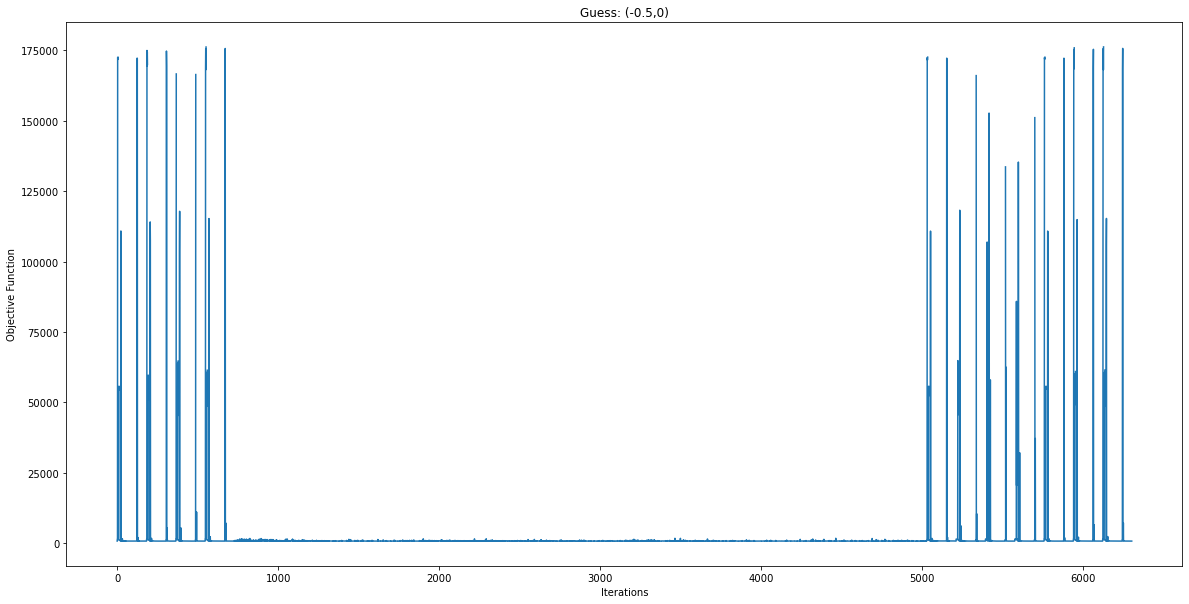

-- It takes 6.867571830749512 seconds to Complete --


-- Genetic Algorithim  --

 The best solution found:
 [ 0.03052407 -0.07604907]

 Objective function:
 727.4661646150967


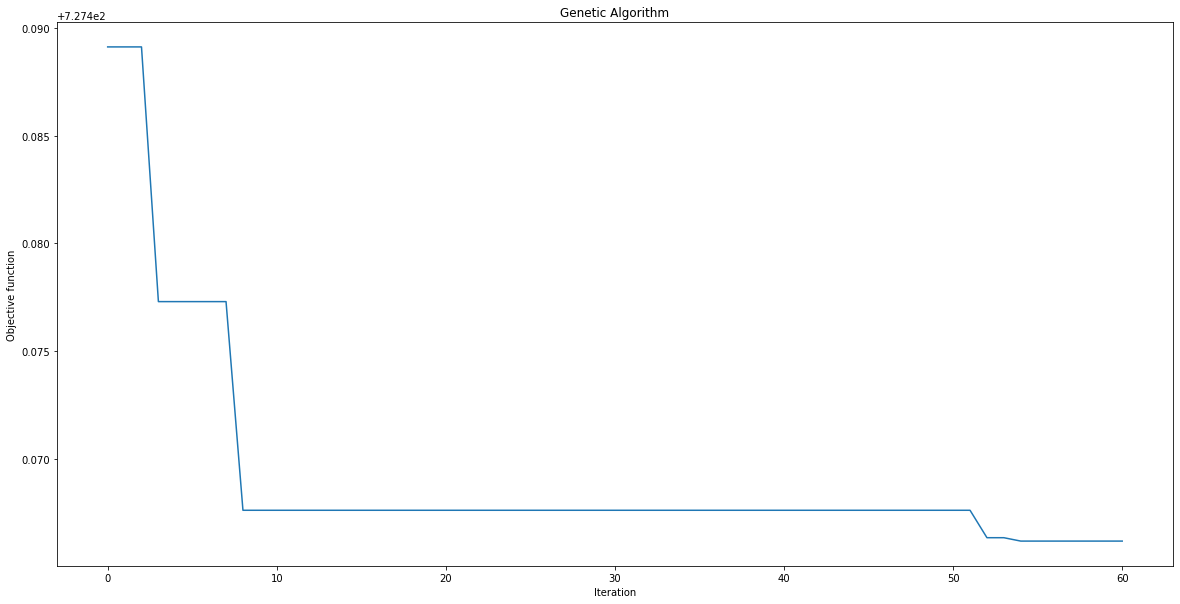

--- It takes 25.755875825881958 seconds to Complete---


Next,

Our guess starting values 0.5 and -0.5 DID NOT CONVERGE.
It returned parameters nan and nan
The maximum likelihood hood function we get is: 172954.40821138382




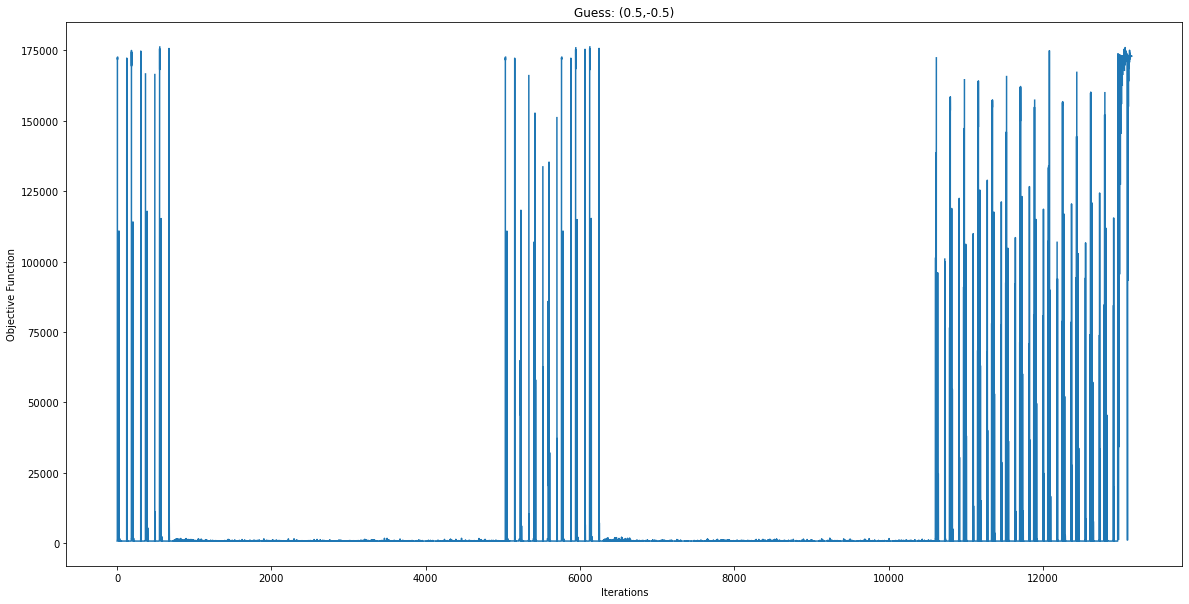

-- It takes 13.46822476387024 seconds to Complete --


-- Genetic Algorithim  --

 The best solution found:
 [ 0.00819793 -0.05448869]

 Objective function:
 727.4629965754993


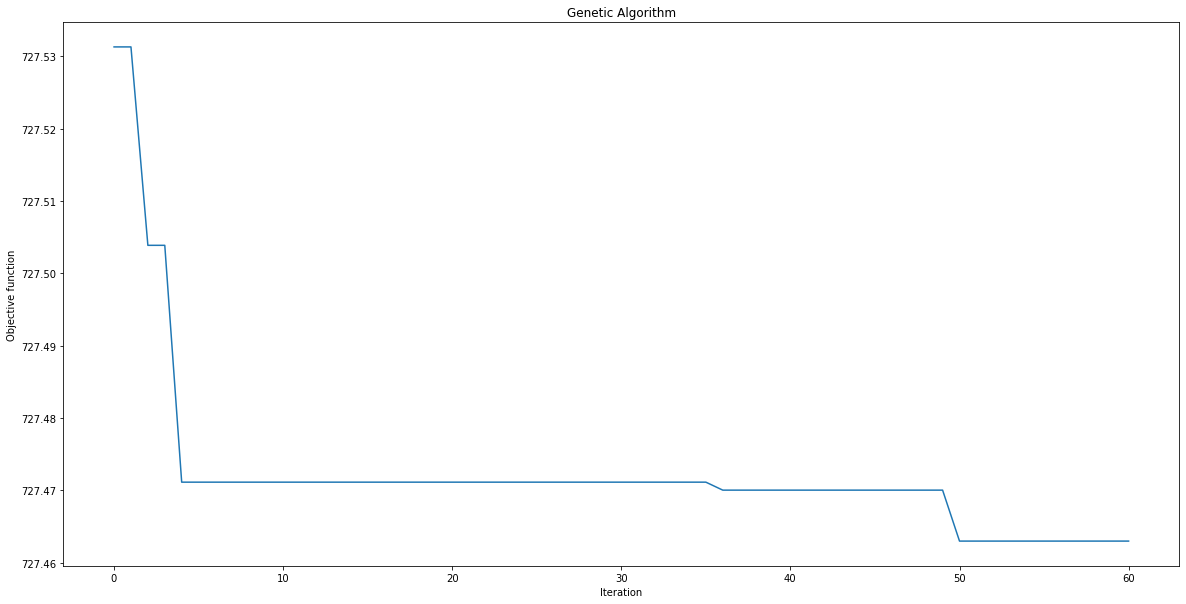

--- It takes 26.48812460899353 seconds to Complete---


Next,



In [12]:
myguess = [(-0.25,0),(-0.5,0),(0.5,-0.5)]
for size in [100, 500]:
    true1 = -0.65
    true2 = 0.65
    print(f"Using a sample size of {size} and True Parameters {true1} and {true2}\n")
    count = 0
    temp = []
    countlist = []
    for k,v in myguess:
        start_time = time.time()
        count += 1
        data = datageneratingprocess(true1, true2, size)
        init = createguess(k,v)
        newtonsolution = newtonraphson(init)
        plt.figure(figsize=(20, 10))
        plt.title(f'Guess: ({k},{v})')
        plt.xlabel("Iterations")
        plt.ylabel("Objective Function")
        if np.isnan(newtonsolution[0]) == False:
            print(f"Our guess starting values {k} and {v} worked. \nIt returned parameters {newtonsolution[0]} and {newtonsolution[1]}\nThe maximum likelihood hood function we get is: {temp[-1]}\n\n")
            plt.plot(temp)
        else:
            print(f"Our guess starting values {k} and {v} DID NOT CONVERGE.\nIt returned parameters {newtonsolution[0]} and {newtonsolution[1]}\nThe maximum likelihood hood function we get is: {temp[-1]}\n\n")
            plt.plot(temp)
        plt.show();

        print("-- It takes %s seconds to Complete --\n\n" % (time.time() - start_time))

        print(f"-- Genetic Algorithim  --\n")
        start_time = time.time()
        geneticalgorithm()
        print("--- It takes %s seconds to Complete---\n\n" % (time.time() - start_time))

        print('Next,\n')


    

### Summary/Results

a) Our tuning parameters for the genetic Optimization can be seen here:  
```
algorithm_param = {'max_num_iteration': 60,
                   'population_size':100,
                   'mutation_probability':0.1,
                   'elit_ratio': 0.01,
                   'crossover_probability': 0.5,
                   'parents_portion': 0.3,
                   'crossover_type':'uniform',
                   'max_iteration_without_improv':None}
```
I chose 3 starting values, 2 that would return parameters and 1 that would not converge our guess from (i)-(iv) are the following in respective order:  
```
myguess = [(0.7, 0.5675), (0.478, 0.290), (0.99, 0.0001)]

myguess = [(0.1, 0.95), (0.992, 0.0679), (0.01, 0.99)]

myguess = [(1,0),(0,1),(0.9,0.004)]

myguess = [(-0.25,0),(-0.5,0),(0.5,-0.5)]
```
b) Most of our result we well behaved. By inspection of our results and the graphs provided we can clearly see spikes in all funcations. It seemed like (ii) had many spikes which leads me to say that it was the least behaved function. While every other function was fairly well behaved.

c) By inspection of my results, I provided the computational time underneath the graphs. As the sample sized increased the computational time increased.  

d)  

i) For the first set, both of our guesses had the same maximum likelihood results of 139.6138, for both guesses {0.7,0.568} as well as {0.99, 0.0001}. When compared with the actual result of {0.85,0.3}. Generally in this case both estimates were about 0.15 from the True Parameter 1, and approx. 30 away from true parameter 2.  

   ii) For the second set, Our guess of {0.1,0.95} was the most accurate, with a maximum likelihood of score 142.781699. When we compare this with our true parameter we note that the true parameters are {0.05,0.98}, generally in this case 0.05 is .05 away from 1, however, 0.98 is 0.03 away from 0.95 giving some meaning to the distance between 0.05 and 0.98 and our guesses.  

   iii) For our third set, for T = 100 Our guesses of {1,0} and {0.9,0.004} were equally close to the true Parameters of {0.98,0.05} with a maximum likelihood function of 139.6159. However for T=500 we see our maximum likelihood function shoot up for 727, which means it becomes less accurate through more samples. This could be the cause of not being able to escape the local optimum.  

   iv) For our fourth and final set, once again two of our guesses have equal maximum likelihood {-0.25,0} and {-0.5,0} have the same maximum likelihood function of 139.9633 for T=100, and then again jumps to 727.461 for T=500. Worth noting is this is compared with true parameters {-0.65,0.65} of our data set.  
  
e) Generally the results did not improve when the sample size increased. This could be the cause of the algorithm not being able to escape the local optimum. But when the algorithm was able to escape the local optimum our result generally improved.  

f) The Optimizer that got our team closest to our True Value was our estimates in one, where our funcation at T=500 had the lowest maximum likelihood score of 727.267 for both of the estimates.


Initialize the genetic algorithm at the point where the Newton method converged. Where you able to increase the value of the likelihoodwith the genetic algorithm ? Discuss your result.

In [27]:
data = datageneratingprocess(0.85, 0.3, 100)
init = createguess(0.8, 0.25)
newtonraphson(init)


array([0.89381297, 0.07003771])

In [30]:
init = createguess(0.89381297, 0.07003771)
newtonraphson(init)
func([0.89381297, 0.07003771])

139.6139811945577

 The best solution found:
 [0.89664783 0.06334279]

 Objective function:
 139.61660048436988


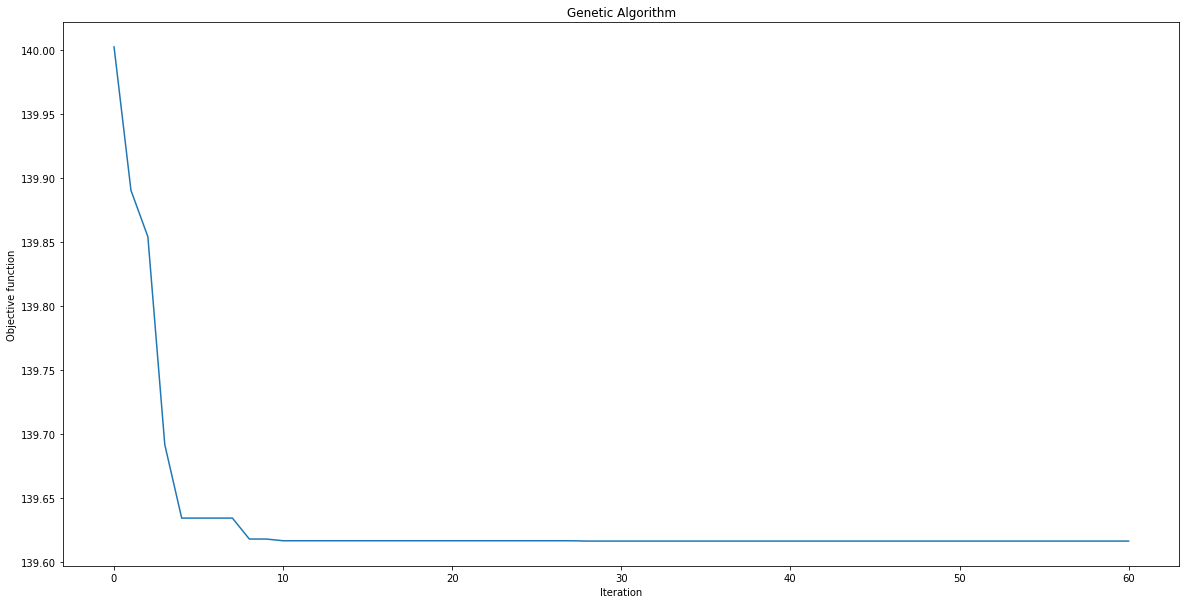

In [29]:
geneticalgorithm()

As we see we were not able to increase the likelihood function using the genetic optimization, it acutally performed worse(by a minimal amount). If this function is already in the global optimization there won't be much to increasing to the objective function. (Which seems to be the case for this problem). The params given by the optimization methods are quite close to the true values. 

In [36]:
data = datageneratingprocess(-0.65, 0.65, 100)
init = createguess(-0.65, 0.65)
newtonraphson(init)

array([nan, nan])

 The best solution found:
 [-0.30738718  0.12018032]

 Objective function:
 139.9850434441525


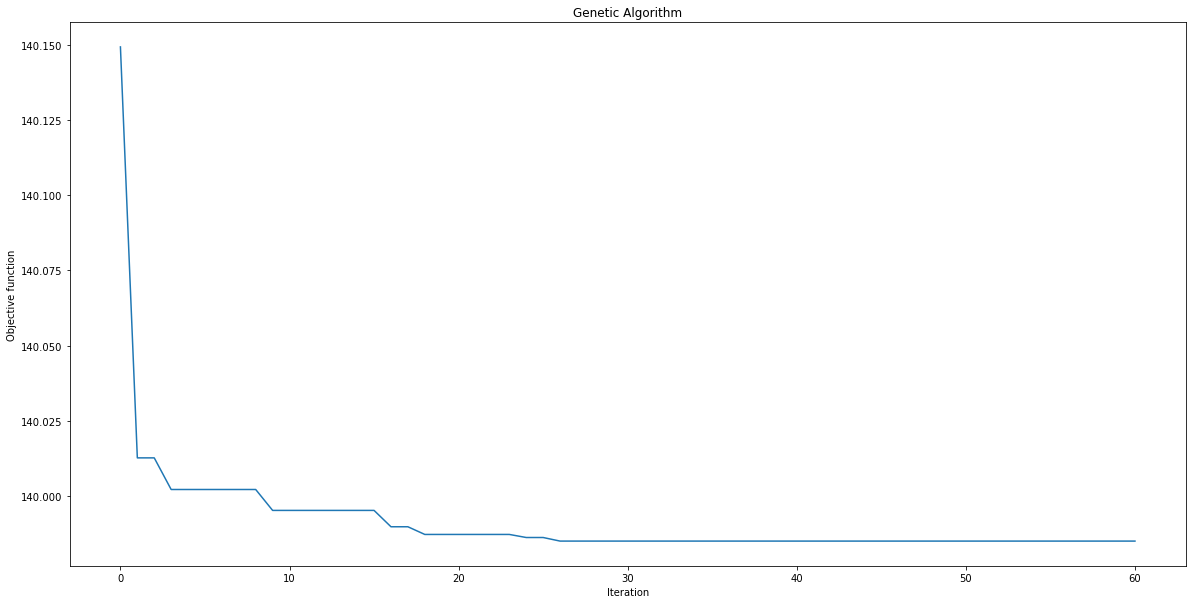

In [33]:
geneticalgorithm()

In [39]:
data = datageneratingprocess(-0.65, 0.65, 500)
init = createguess(-0.65, 0.65)
newtonraphson(init)

array([nan, nan])

 The best solution found:
 [-0.13774818  0.08559414]

 Objective function:
 727.4947354666691


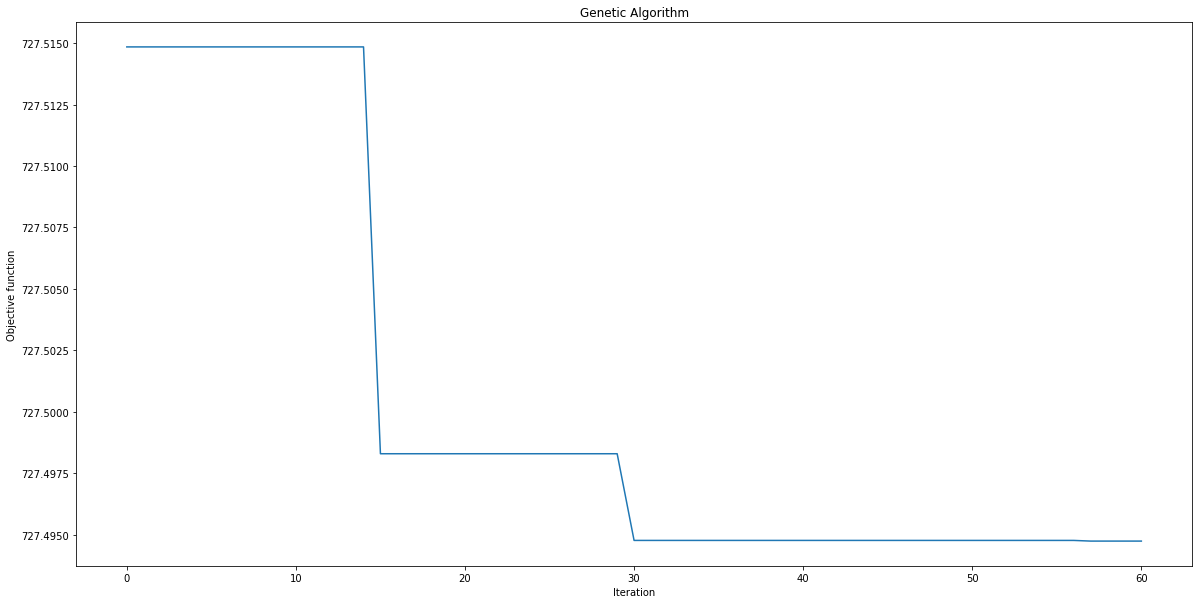

In [40]:
geneticalgorithm()

For the gradient based method we see that our guess, using the true values did not work. I believe this is because of root cancelation of the guess when the gradient based method is trying to converge. We see that the genetic algorithm is not impacted by root cancelation. A noticable difference is that when the sample size increased from T = 100 to T = 500 the genetic algorithm was not able to find a maximum liklihood that is close to the one found in the T = 100. I think the genetic algorithm was not able to escape the local optimum. The maximum likelihood estimates we found for the genetic algorithms was:  
`T = 100, 139.985, Params: -0.31  0.12`  
`T = 500, 727.495, Params: -0.14  0.09`  
As we can see by inspection of our results the genetic algorithm that has was able to max the likelihood function more had closer results to the true value. It is my belief that the `T = 500` algorithm was not able to escape the local optimum.

What we learned most:  
> I found comparing the genetic algorithm and gradient based method had some pros and cons. It seemed from running my results generating different data everytime that the gradient method sometimes performed better than the genetic algorithm. While the gradient can perform better than the genetic algorithm sometime, it comes with some problems such as root cancelation. Though in a real life research setting we would have some sort of idea what the "True" values were and we could make better guesses so our gradient based methods would converge instead of making random guesses what our true values were.

# Part Two
Building my own KNN classifier  
 

In [ ]:
from random import uniform
import pandas as pd 
import numpy as np 
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier ## Our "canned classifier"
import numpy as np
from collections import defaultdict

In [ ]:
#Our DGP
def createoutputvariable(x,w,e):
    y = x + w + e
    if (y >= 1.5):
        return 1    
    else:
        return 0
        
#Function to Calculate the error rate
def errorratefunc(y, ypred):
    n = 0
    error = 0
    for i, k in zip(y, ypred):
        n += 1 
        if (i != k):
            error += 1
    return error/n


## This code creates the DGP
Using a Uniform(0,1) and sample size of 500

In [ ]:
X = []
W = []
E = []
#Create a 1000 samples
for _ in range(500):
    #Standard normal distribution
    value1 = uniform(0, 1)
    value2 = uniform(0, 1)
    value3 = uniform(0, 1)
    #inserting into lists 
    X.append(value1)
    W.append(value2)
    E.append(value3)

#Create a pandas dataframe(easier to work with)
df = pd.DataFrame(
    {'x': X,
     'w': W,
     'e': E
    })
df['y'] = df.apply(lambda z: createoutputvariable(z.x, z.w, z.e), axis=1)
df.drop(columns='e', inplace=True)

## Buliding my KNN Classifier  
This class defaults to 5 neighbors and the l2 norm. To specify the neighbors you must pass in `n_neighbors` parameter and for the norm `p = 1` is the l1norm and `p = 2` is for the l2norm

In [ ]:
class DIYKNeighborsClassifier(object):
    def __init__(self, n_neighbors=5, p=2):
        """
        p = 2 (i.e. defualt to l2 norm) 
        n_neighbors = 5 (default to 5 neighbors
         """
        self.n_neighbors = n_neighbors
        self.p = p

    def fit(self, X, y):
        self.X = X
        self.y = y
        return self

    def calculatenorm(self, d1, d2):
        """1: Manhattan(l1 norm), 2: Euclidean(l2 norm)"""
        if self.p == 1:
            return sum(abs(d1 - d2))          
        elif self.p == 2:
            return np.sqrt(sum((d1 - d2)**2))

    def singlepredict(self, test):
        calculatedistance = sorted((self.calculatenorm(x, test), y) for x, y in zip(self.X, self.y))
        w = calculatedistance[:self.n_neighbors]
        w_in = defaultdict(list)
        for d, c in w:
            w_in[c].append(d)
        return max((sum(val), key) for key, val in w_in.items())[1]

    def predict(self, X):
        return [self.singlepredict(x) for x in X]

In [ ]:
X = df.drop(columns='y').values
y = df['y'].values

## Two Tests
I decided to test the algorithm twice. The first method I use the who sample as the training set and testing set. Next I decided to split the dataset into train and test keeping 30% of the data for testing and 70% of the data for fitting.   
I wanted to split it up because when `n_neighbors = 1` using the first method we see that the the training sample will choose the closest training sample to our test sample. Since our test sample is the training set, our model when KNN = 1 will choose itself as the closest, which will have an error rate of 0.

### First Method

In [ ]:
neighbor = [1, 5]
lnorm = [1,2]

for l in lnorm:
    for n in neighbor:
        diy_knn_model = DIYKNeighborsClassifier(n_neighbors=n, p=l)
        canned_knn_model = KNeighborsClassifier(n_neighbors=n)

        diy_knn_model.fit(X,y)
        canned_knn_model.fit(X,y)

        diy_predknn = diy_knn_model.predict(X)
        canned_predknn = canned_knn_model.predict(X)

        diy_errorate = errorratefunc(y, diy_predknn)
        canned_errorrate = errorratefunc(y, canned_predknn)

        print(f"Using a l{l}norm with a neighbor of {n}. The error rate for my KNN Classifier is: {diy_errorate} and the error rate for the “cannned” classifier is: {canned_errorrate}")

### Second Method

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, df['y'], test_size=.3)

In [ ]:
X_train, X_test = X_train.drop(columns='y').values, X_test.drop(columns='y').values

In [ ]:
neighbor = [1, 5]
lnorm = [1,2]

for l in lnorm:
    for n in neighbor:
        diy_knn_model = DIYKNeighborsClassifier(n_neighbors=n, p=l)
        canned_knn_model = KNeighborsClassifier(n_neighbors=n)

        diy_knn_model.fit(X_train,y_train)
        canned_knn_model.fit(X_train,y_train)

        diy_predknn = diy_knn_model.predict(X_test)
        canned_predknn = canned_knn_model.predict(X_test)

        diy_errorate = errorratefunc(y_test, diy_predknn)
        canned_errorrate = errorratefunc(y_test, canned_predknn)

        print(f"Using a l{l}norm with a neighbor of {n}. The error rate for my KNN Classifier is: {diy_errorate} and the error rate for the “cannned” classifier is: {canned_errorrate}")

Results and Discussion  
### First Method
We see that our test sample is the training set, so when when `n_neighbors = 1` we have an error rate of 0. So this does not give us any information to if our DIY classfier is better/worse than our canned classfier.  
We see that for when the `n_neighbors = 5`, For both l1norm and l2norm our DIY classfier has an error rate of 28%, while the canned classfier has a error rate of 19.6%. The canned classfier outperformed my classfier.  

When using the l2norm method, for our DIY classfier, we get the exact same results for both classfiers.

### Second Method  
When `n_neighbors = 1` and using the l1 norm, we see our DIY classfier has a error rate of 35.33%, while the canned classfier has an error rate of 37.33%. The DIY outperformed the canned classfier.

When `n_neighbors = 1` and using the l2 norm, we see our DIY classfier has a error rate of 37.33%, while the canned classfier has an error rate of 37.33%. The DIY and the canned classfier performed the same.  

When `n_neighbors = 5` and using the l1 norm, we see our DIY classfier has a error rate of 30%, while the canned classfier has an error rate of 28%. The canned classfier outperformed the DIY classfier.  

When `n_neighbors = 5` and using the l2 norm, we see our DIY classfier has a error rate of 28%, while the canned classfier has an error rate of 28%. The DIY and the canned classfier performed the same.  

Overall our classfier performed worse than the canned classfier